1. Problem Understanding

a) Defining problem statement

Basically any house is valued based on the are in which it is located and it's dimesnions which is measured in square feet. (For ex : 30*40 = 1200sqft). So any layman or common individual would obviously wish to know all the features related to housing value properties. Henc eif in case if we wish to buy any house or sell any house then we will be not knowing the exact amount to which it's being valued whether the cost involved is more or less so in order to address these kind of issues we tend to take samples information which is already existig such as finding same pattern in the same locality and with that data we can try to predict the house value. 

b) Need of the study/project

The basic need of the study of this project is to determine the right correct price of the housing value. So when any person actually tries to buy or sell a house, usually they won't know the exact price to which it should be sold or bought. Hence the house value might be undervalued or overvalued. Based on the data such as the available information of the house property in that particular geographical location we can determine the price. Primarily we should ensure to make bette runderstanding of the various important factors and features which helps in determining the right house pricing. 

c) Understanding business/social opportunity

Here main ideallogy is to avoid the loss and time so many people will not be aware of the features which actually determines the house price. So in order to help them further we can provide them a detailed information and guidelines based on house buy/sell services so that people can buy the property with feasible prices so that losses can be minimised and waiting time can br reduced. 

2. Data Report

a) Understanding how data was collected in terms of time, frequency and methodology 

Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

Top 5 rows of the data

In [2]:
df = pd.read_excel("innercity.xlsx")
df.head()

cid         dayhours     price  room_bed  room_bath  \
0  3.876101e+09  20150427T000000  600000.0       4.0       1.75   
1  3.145600e+09  20150317T000000  190000.0       2.0       1.00   
2  7.129303e+09  20140820T000000  735000.0       4.0       2.75   
3  7.338220e+09  20141010T000000  257000.0       3.0       2.50   
4  7.950301e+09  20150218T000000  450000.0       2.0       1.00   

   living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0          3050.0       9440.0  1.0   0.0    0.0  ...   1250.0    1966.0   
1           670.0       3101.0  1.0   0.0    0.0  ...      0.0    1948.0   
2          3040.0       2415.0  2.0   1.0    4.0  ...      0.0    1966.0   
3          1740.0       3721.0  2.0   0.0    0.0  ...      0.0    2009.0   
4          1120.0       4590.0  1.0   0.0    0.0  ...      0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

  furnished  total_area  
0       0.0     12490.0  
1       0.0      3771.0  
2       0.0      5455.0  
3       0.0      5461.0  
4       0.0      5710.0  

[5 rows x 23 columns]

Last 5 rows of the data

In [3]:
df.tail()

cid         dayhours      price  room_bed  room_bath  \
21608  2.036006e+08  20150310T000000   685530.0       4.0       2.50   
21609  6.250493e+08  20140521T000000   535000.0       2.0       1.00   
21610  4.240690e+08  20140905T000000   998000.0       3.0       3.75   
21611  7.258200e+09  20150206T000000   262000.0       4.0       2.50   
21612  8.805900e+09  20141229T000000  1150000.0       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
21608          3130.0      60467.0  2.0   0.0    0.0  ...      0.0    1996.0   
21609          1030.0       4841.0  1.0   0.0    0.0  ...    110.0    1939.0   
21610          3710.0      34412.0  2.0   0.0    0.0  ...    800.0    1978.0   
21611          1560.0       7800.0  2.0   0.0    0.0  ...      0.0    1997.0   
21612          1940.0       4875.0  2.0   0.0    0.0  ...      0.0    1925.0   

       yr_renovated  zipcode      lat     long  living_measure15  \
21608           0.0  98014.0  47.6618 -121.962            2780.0   
21609           0.0  98103.0  47.6860 -122.341            1530.0   
21610           0.0  98075.0  47.5888  -122.04            2390.0   
21611           0.0  98168.0  47.5140 -122.316            1160.0   
21612           0.0  98112.0  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
21608        44224.0       1.0     63597.0  
21609         4944.0       0.0      5871.0  
21610        34412.0       1.0     38122.0  
21611         7800.0       0.0      9360.0  
21612         4875.0       1.0      6815.0  

[5 rows x 23 columns]

b) Visual inspection of data (rows, columns, descriptive details)

Shape of the data

In [4]:
df.shape

(21613, 23)

Describe the data

In [5]:
df.describe()

cid         price      room_bed     room_bath  living_measure  \
count  2.161300e+04  2.161300e+04  21505.000000  21505.000000    21596.000000   
mean   4.580302e+09  5.401822e+05      3.371355      2.115171     2079.860761   
std    2.876566e+09  3.673622e+05      0.930289      0.770248      918.496121   
min    1.000102e+06  7.500000e+04      0.000000      0.000000      290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000     1429.250000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000     1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000     2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000    13540.000000   

        lot_measure         sight       quality  ceil_measure      basement  \
count  2.157100e+04  21556.000000  21612.000000  21612.000000  21612.000000   
mean   1.510458e+04      0.234366      7.656857   1788.366556    291.522534   
std    4.142362e+04      0.766438      1.175484    828.102535    442.580840   
min    5.200000e+02      0.000000      1.000000    290.000000      0.000000   
25%    5.040000e+03      0.000000      7.000000   1190.000000      0.000000   
50%    7.618000e+03      0.000000      7.000000   1560.000000      0.000000   
75%    1.068450e+04      0.000000      8.000000   2210.000000    560.000000   
max    1.651359e+06      4.000000     13.000000   9410.000000   4820.000000   

       yr_renovated       zipcode           lat  living_measure15  \
count  21613.000000  21613.000000  21613.000000      21447.000000   
mean      84.402258  98077.939805     47.560053       1987.065557   
std      401.679240     53.505026      0.138564        685.519629   
min        0.000000  98001.000000     47.155900        399.000000   
25%        0.000000  98033.000000     47.471000       1490.000000   
50%        0.000000  98065.000000     47.571800       1840.000000   
75%        0.000000  98118.000000     47.678000       2360.000000   
max     2015.000000  98199.000000     47.777600       6210.000000   

       lot_measure15     furnished  
count   21584.000000  21584.000000  
mean    12766.543180      0.196720  
std     27286.987107      0.397528  
min       651.000000      0.000000  
25%      5100.000000      0.000000  
50%      7620.000000      0.000000  
75%     10087.000000      0.000000  
max    871200.000000      1.000000

c) Understanding of attributes (variable info, renaming if required)

Columns names

In [6]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

Renaming column names

In [7]:
df.rename(columns = {'yr_built' : 'year_built','yr_renovated' : 'year_renovated'}, inplace=True)

In [8]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

Datatypes details

In [9]:
df.dtypes

cid                 float64
dayhours             object
price               float64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
year_built           object
year_renovated      float64
zipcode             float64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

Info of the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  year_built        21612 non-null  object 
 15  year_renovated    21613 non-null  float64
 16  zipcode           21613 non-null  float6

3) Exploratory data analysis

a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

array([[<AxesSubplot:title={'center':'cid'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'room_bed'}>,
        <AxesSubplot:title={'center':'room_bath'}>],
       [<AxesSubplot:title={'center':'living_measure'}>,
        <AxesSubplot:title={'center':'lot_measure'}>,
        <AxesSubplot:title={'center':'sight'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'ceil_measure'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'year_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'living_measure15'}>,
        <AxesSubplot:title={'center':'lot_measure15'}>,
        <AxesSubplot:title={'center':'furnished'}>]], dtype=object)

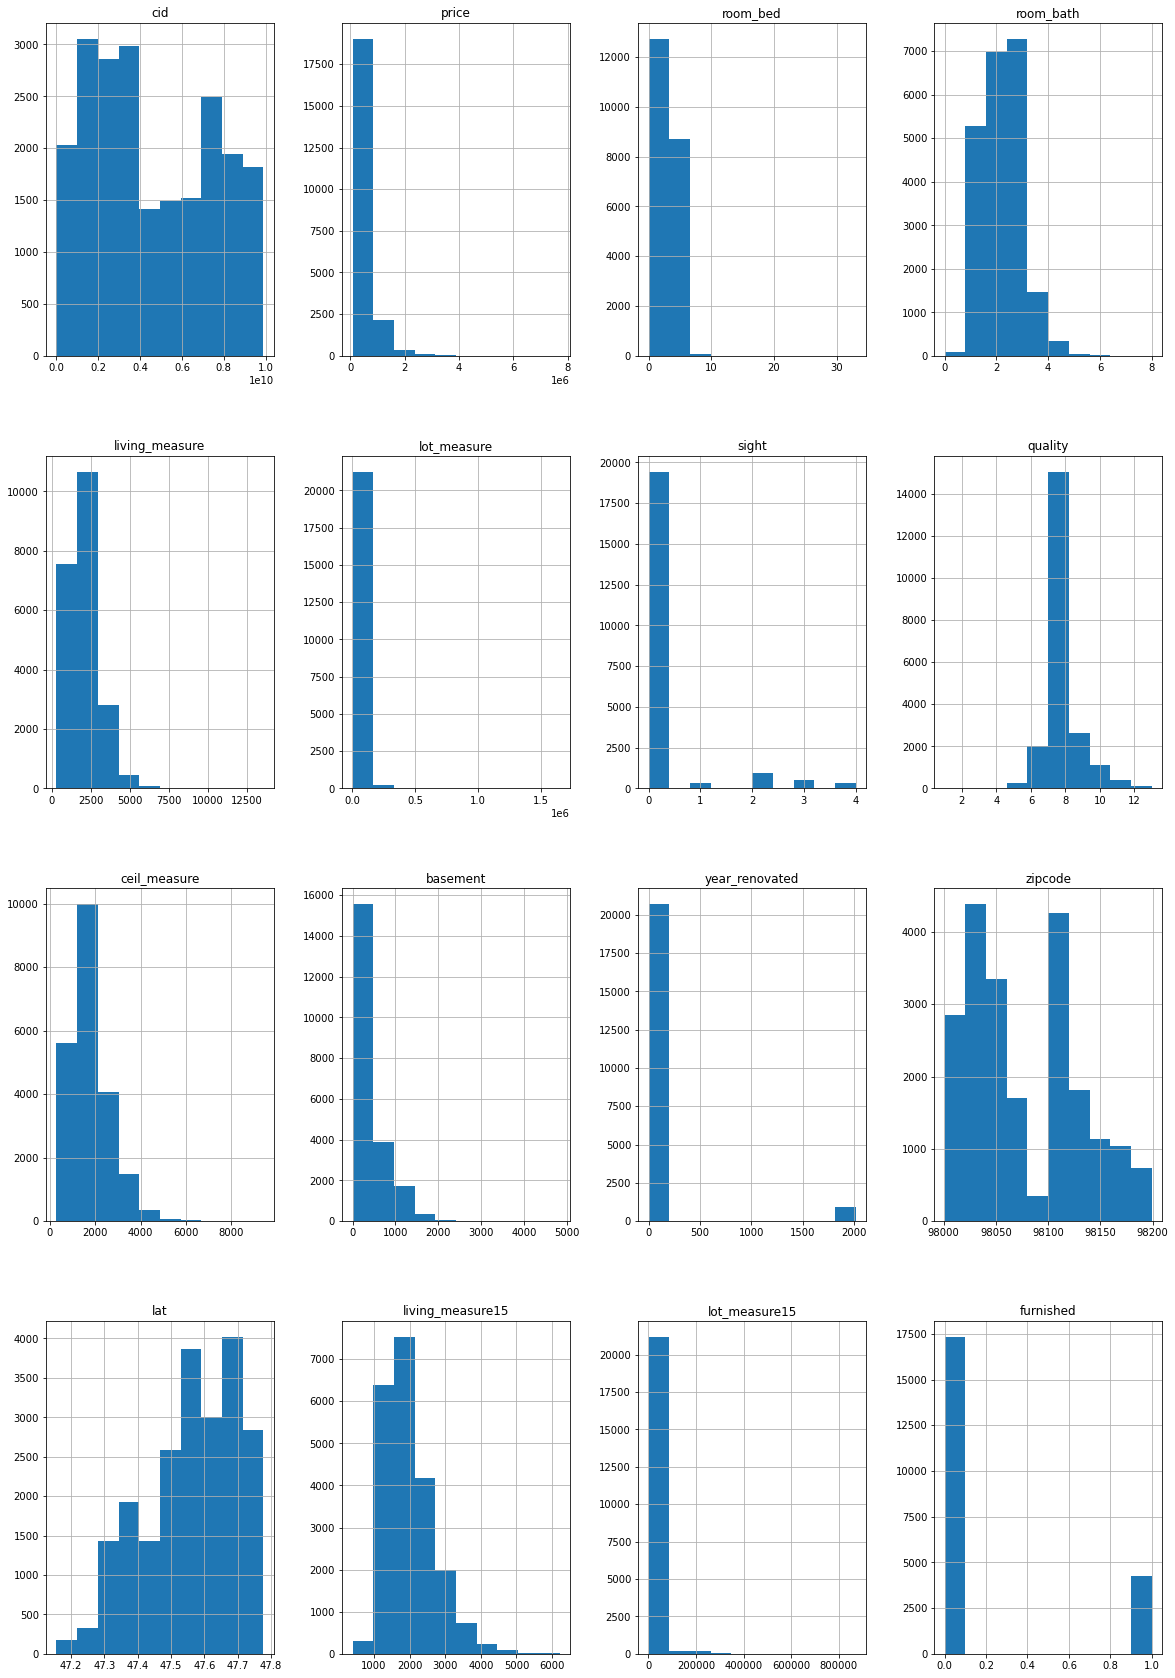

In [11]:
df.hist(figsize=(20,30))

In [12]:
df.dtypes

cid                 float64
dayhours             object
price               float64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
year_built           object
year_renovated      float64
zipcode             float64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

Variable : Price

<AxesSubplot:xlabel='price'>

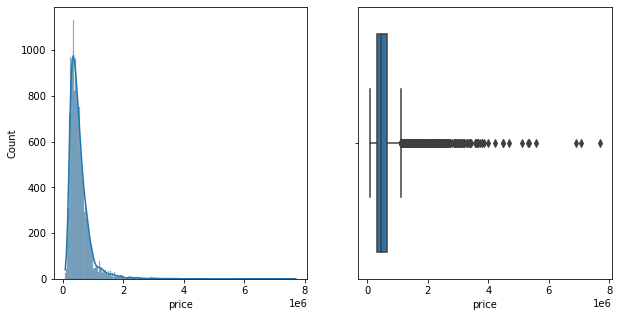

In [13]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.price, kde=True, ax=axs[0])
sns.boxplot(x='price',data=df, ax=axs[1])

In [14]:
df.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Variable : cid

Text(0.5, 0.98, 'CID Variable Anaylsis')

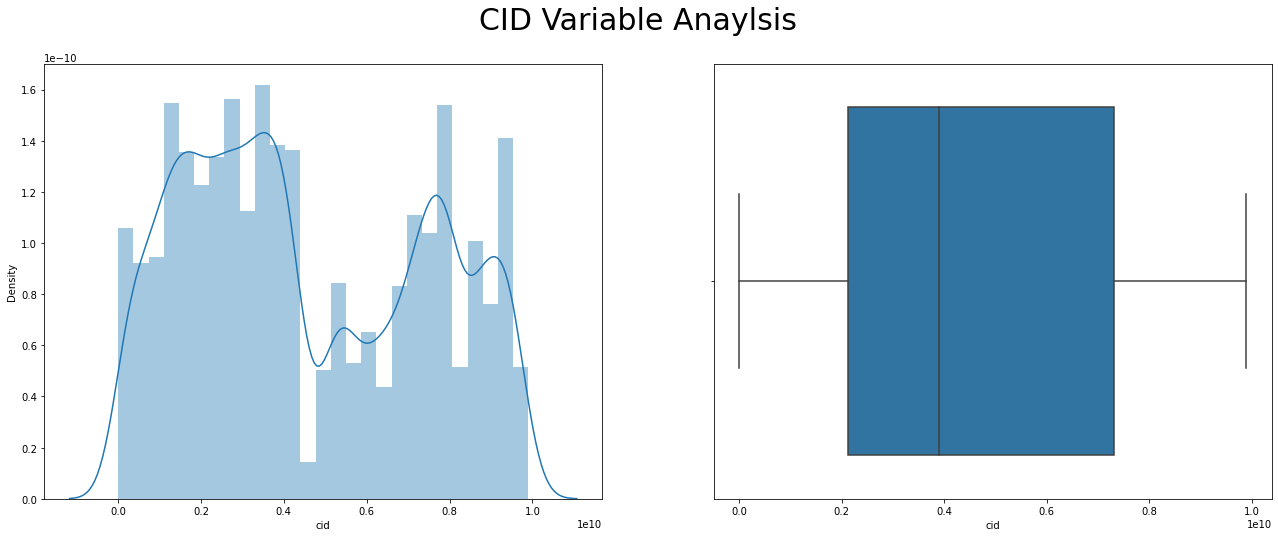

In [15]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['cid'], ax=ax[0])
sns.boxplot(df['cid'],  orient='h', ax=ax[1])
fig.suptitle("CID Variable Anaylsis", size=30)

In [16]:
cid_count=df.cid.value_counts()
cid_count[cid_count>1].shape

(176,)

In [17]:
cid_count.unique()

array([3, 2, 1], dtype=int64)

Variable : room_bed

Text(0.5, 1.0, 'Bed Room Analysis')

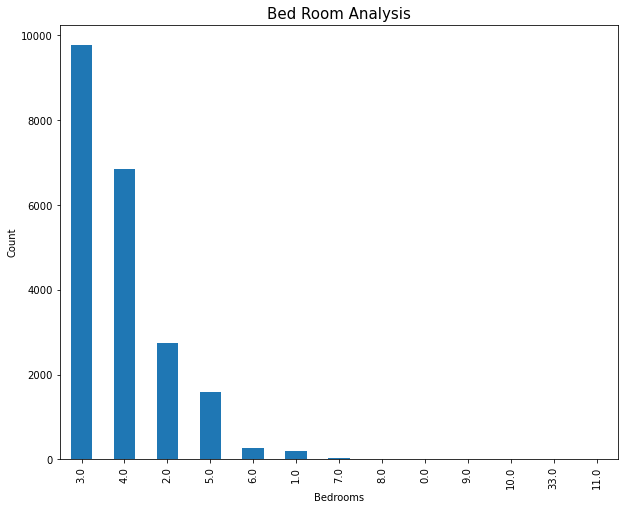

In [18]:
plt.figure(figsize=(10,8))
df['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title("Bed Room Analysis", size=15)

In [19]:
df['room_bed'].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

Variable : room_bath

Text(0.5, 1.0, 'Bathroom Analysis')

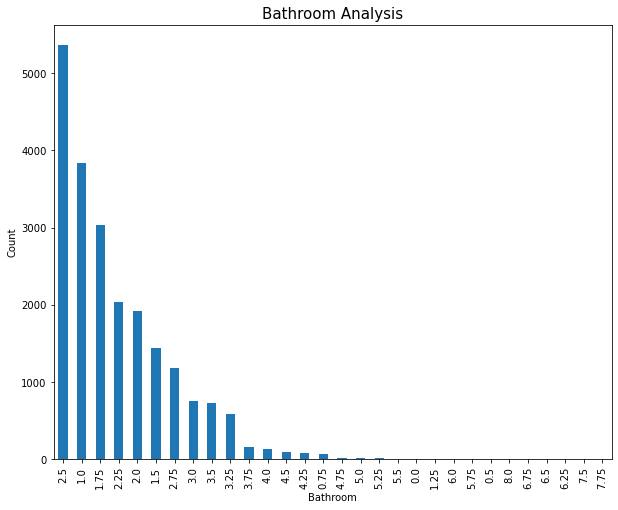

In [20]:
plt.figure(figsize=(10,8))
df['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.title("Bathroom Analysis", size=15)

In [21]:
df['room_bath'].value_counts()

2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [22]:
room_bath_count=df.room_bath.value_counts()
room_bath_count[room_bath_count>1].shape

(28,)

In [23]:
room_bath_count.unique()

array([5358, 3829, 3031, 2039, 1917, 1439, 1178,  750,  726,  588,  155,
        135,  100,   78,   72,   23,   21,   13,   10,    9,    6,    4,
          2,    1], dtype=int64)

Variable : living_measure

<AxesSubplot:xlabel='living_measure'>

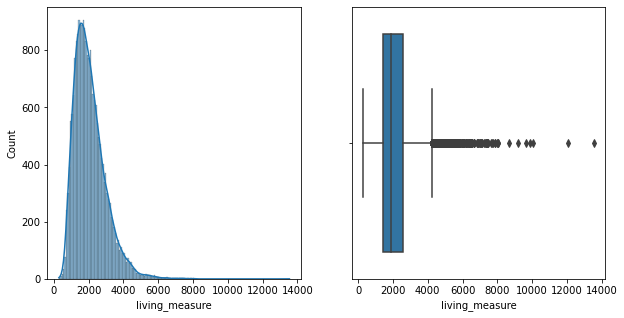

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.living_measure, kde=True, ax=axs[0])
sns.boxplot(x='living_measure',data=df, ax=axs[1])

In [25]:
df.living_measure.describe()

count    21596.000000
mean      2079.860761
std        918.496121
min        290.000000
25%       1429.250000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

Variable : lot_measure

<AxesSubplot:xlabel='lot_measure'>

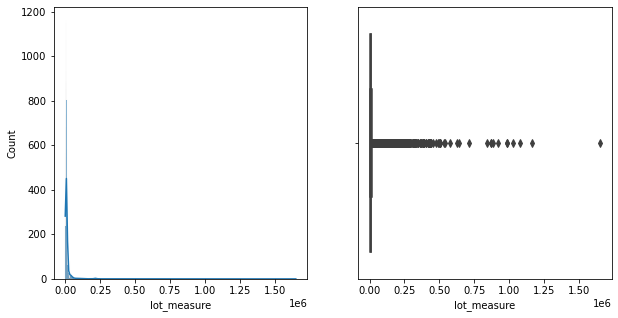

In [26]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.lot_measure, kde=True, ax=axs[0])
sns.boxplot(x='lot_measure',data=df, ax=axs[1])

In [27]:
df.lot_measure.describe()

count    2.157100e+04
mean     1.510458e+04
std      4.142362e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068450e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

Variable: ceil

Text(0.5, 1.0, 'Ceil Analysis')

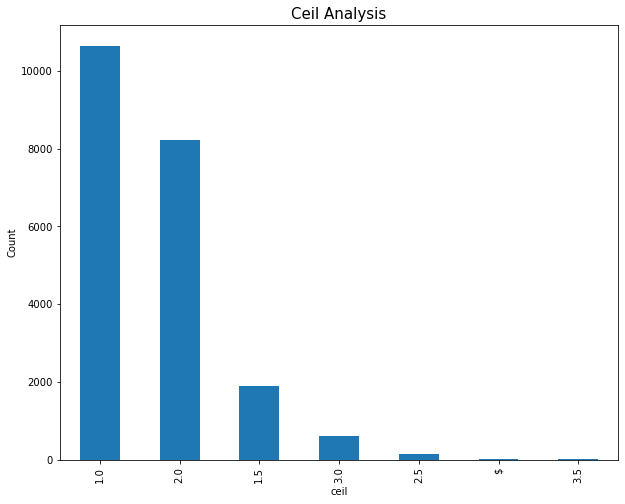

In [28]:
plt.figure(figsize=(10,8))
df['ceil'].value_counts().plot(kind='bar')
plt.title('ceil')
plt.xlabel('ceil')
plt.ylabel('Count')
plt.title("Ceil Analysis", size=15)

In [29]:
df.ceil.value_counts()

1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64

Variable: coast

Text(0.5, 1.0, 'Coast Analysis')

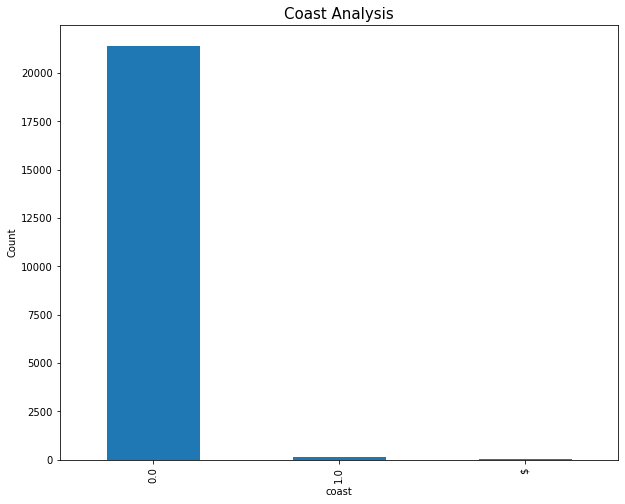

In [30]:
plt.figure(figsize=(10,8))
df['coast'].value_counts().plot(kind='bar')
plt.title('coast')
plt.xlabel('coast')
plt.ylabel('Count')
plt.title("Coast Analysis", size=15)

In [31]:
df.coast.value_counts()

0.0    21421
1.0      161
$         30
Name: coast, dtype: int64

Variable : sight

Text(0.5, 1.0, 'Sight Analysis')

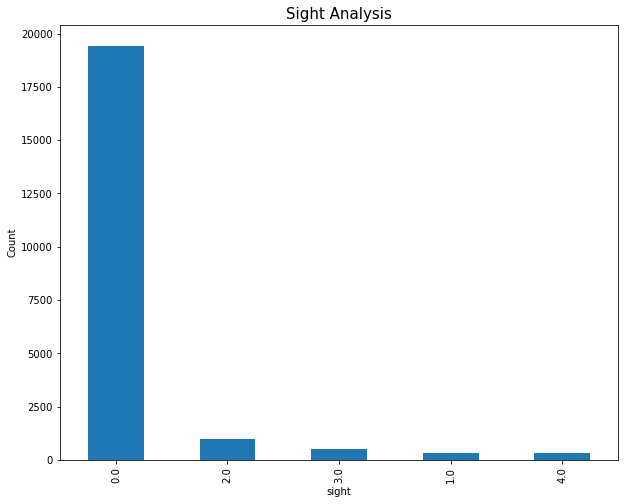

In [32]:
plt.figure(figsize=(10,8))
df['sight'].value_counts().plot(kind='bar')
plt.title('sight')
plt.xlabel('sight')
plt.ylabel('Count')
plt.title("Sight Analysis", size=15)

In [33]:
df.sight.value_counts()

0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

Variable: condition

Text(0.5, 1.0, 'Condition Analysis')

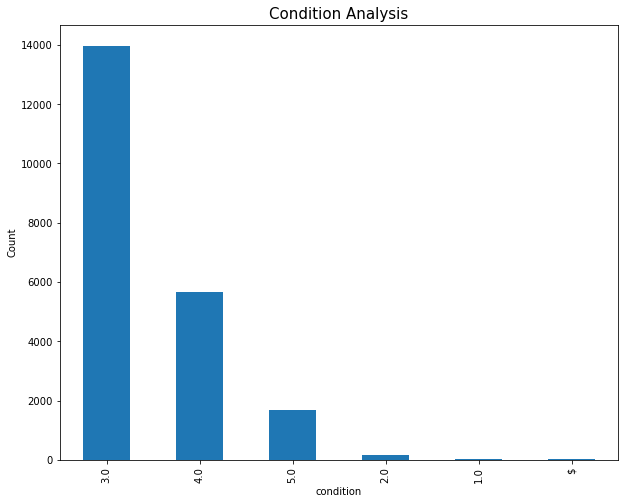

In [34]:
plt.figure(figsize=(10,8))
df['condition'].value_counts().plot(kind='bar')
plt.title('condition')
plt.xlabel('condition')
plt.ylabel('Count')
plt.title("Condition Analysis", size=15)

In [35]:
df.condition.value_counts()

3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
$         28
Name: condition, dtype: int64

Variable : quality

Text(0.5, 1.0, 'Quality Analysis')

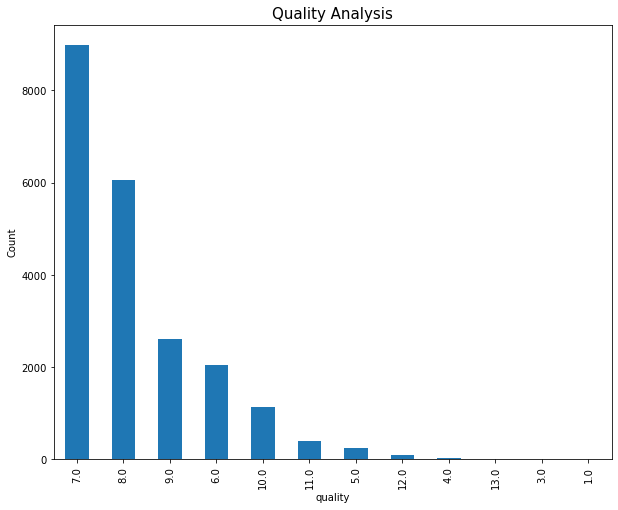

In [36]:
plt.figure(figsize=(10,8))
df['quality'].value_counts().plot(kind='bar')
plt.title('quality')
plt.xlabel('quality')
plt.ylabel('Count')
plt.title("Quality Analysis", size=15)

In [37]:
df.quality.value_counts()

7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64

Variable : ceil_measure

<AxesSubplot:xlabel='ceil_measure'>

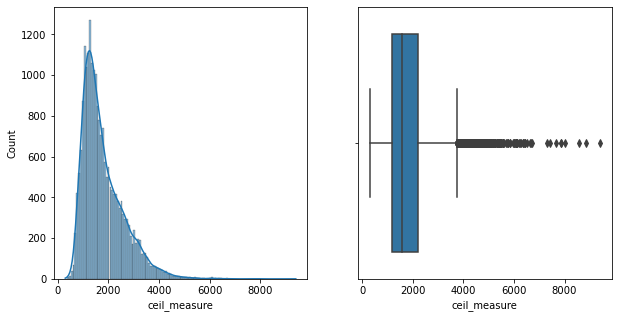

In [38]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.ceil_measure, kde=True, ax=axs[0])
sns.boxplot(x='ceil_measure',data=df, ax=axs[1])

In [39]:
df.ceil_measure.describe()

count    21612.000000
mean      1788.366556
std        828.102535
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

Variable : basement

<AxesSubplot:xlabel='basement'>

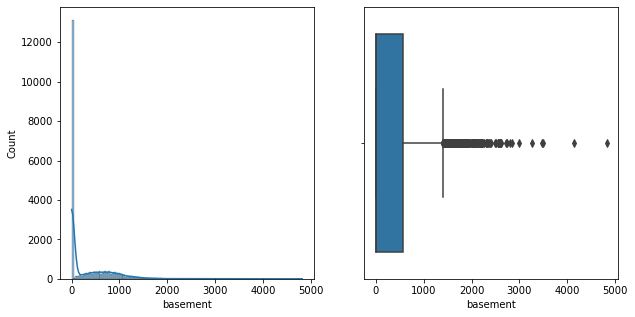

In [40]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.basement, kde=True, ax=axs[0])
sns.boxplot(x='basement',data=df, ax=axs[1])

In [41]:
df.basement.value_counts()

0.0       13125
600.0       221
700.0       218
500.0       214
800.0       206
          ...  
4130.0        1
2050.0        1
784.0         1
518.0         1
2180.0        1
Name: basement, Length: 306, dtype: int64

Variable : year_built

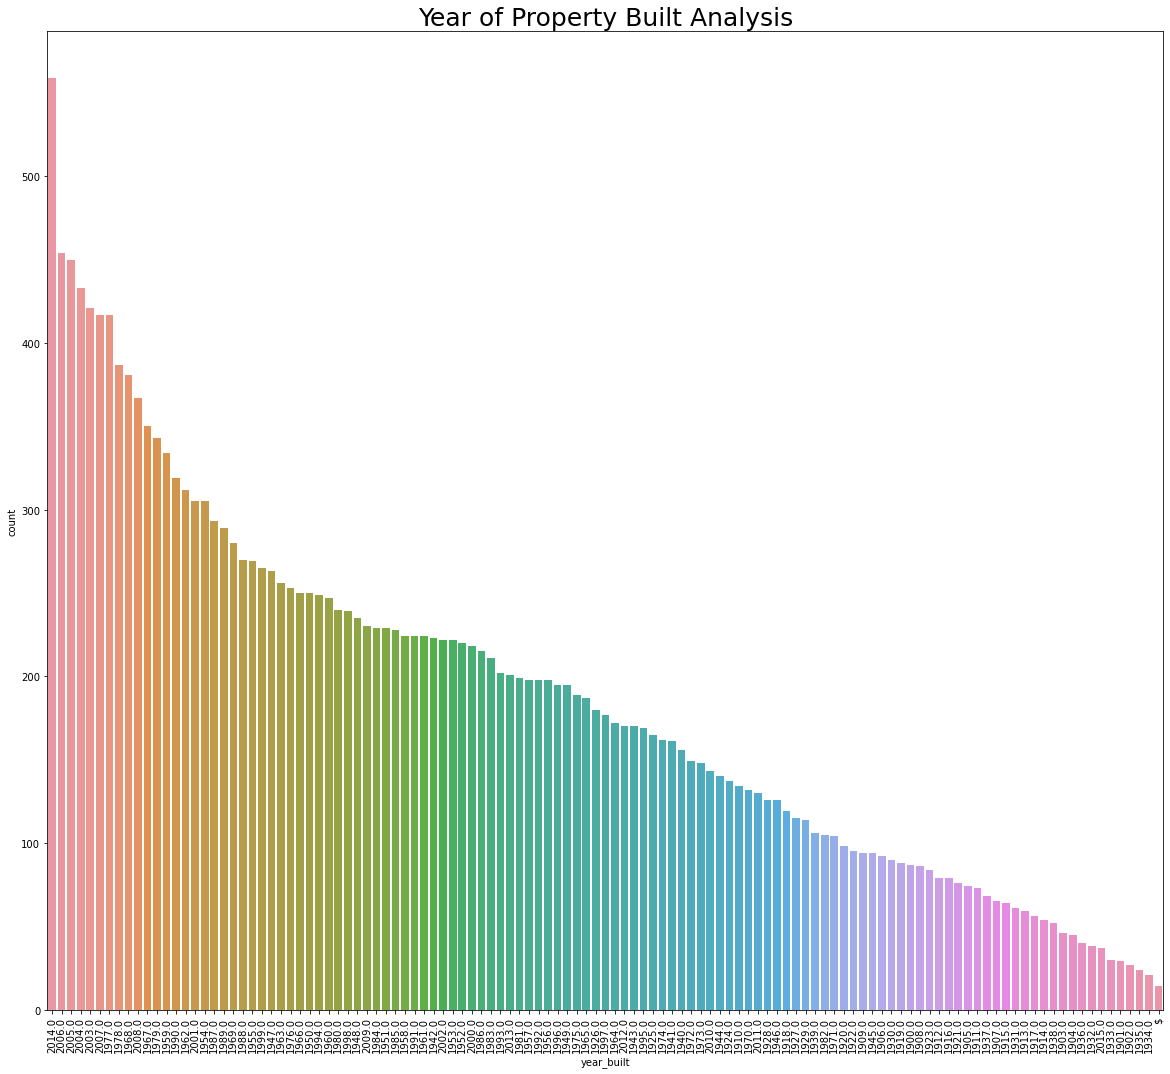

In [42]:
fig,axes = plt.subplots(figsize=(20,18))
sns.countplot(df['year_built'],order = df['year_built'].value_counts().index)
axes.set_xticklabels(df['year_built'].value_counts().index,rotation=90)
plt.title("Year of Property Built Analysis", size=25)
plt.show()

In [43]:
df['year_built'].value_counts()

2014.0    559
2006.0    454
2005.0    450
2004.0    433
2003.0    421
         ... 
1901.0     29
1902.0     27
1935.0     24
1934.0     21
$          14
Name: year_built, Length: 117, dtype: int64

Variable : year_renovated

Text(0.5, 1.0, 'Year of Renovated Properties Analysis')

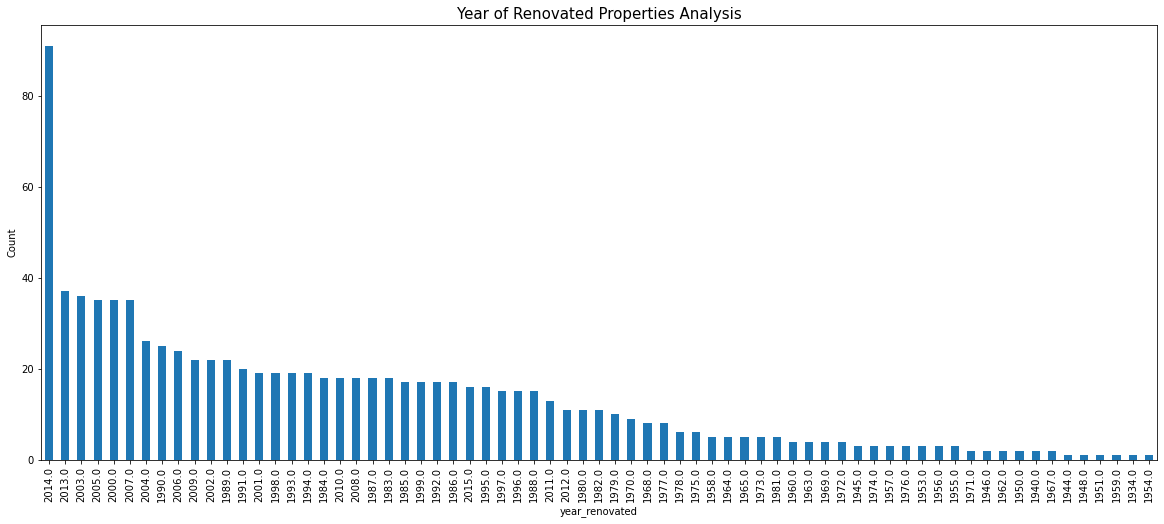

In [44]:
house_df_reno=df[df['year_renovated']>0]
plt.figure(figsize=(20,8))
house_df_reno['year_renovated'].value_counts().plot(kind='bar')
plt.title('year_renovated')
plt.xlabel('year_renovated')
plt.ylabel('Count')
plt.title("Year of Renovated Properties Analysis", size=15)

In [45]:
df.year_renovated.value_counts()

0.0       20699
2014.0       91
2013.0       37
2003.0       36
2007.0       35
          ...  
1944.0        1
1948.0        1
1959.0        1
1951.0        1
1954.0        1
Name: year_renovated, Length: 70, dtype: int64

In [46]:
df[df['year_renovated']>0].shape

(914, 23)

Variable : zipcode

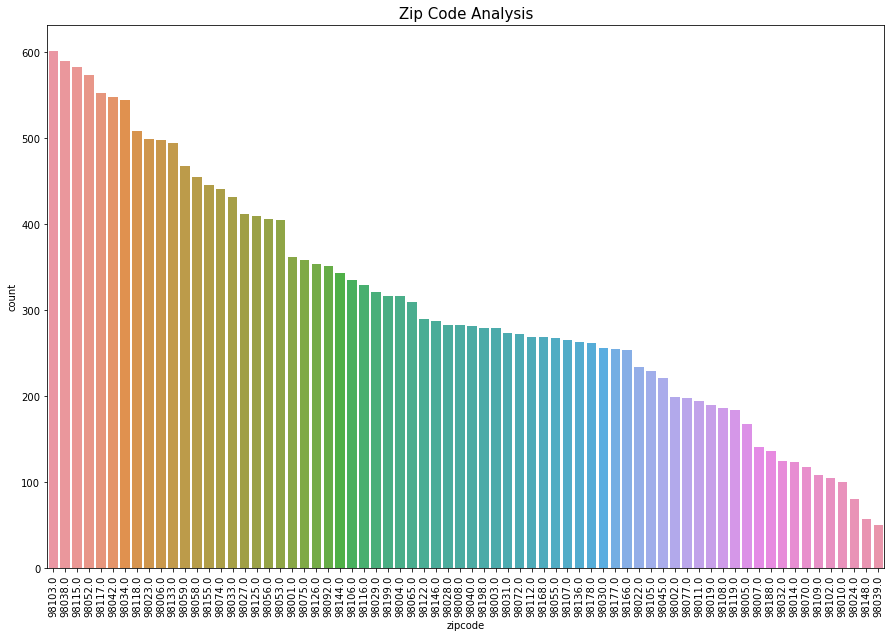

In [47]:
fig,axes = plt.subplots(figsize=(15,10))
sns.countplot(df['zipcode'],order = df['zipcode'].value_counts().index)
axes.set_xticklabels(df['zipcode'].value_counts().index,rotation=90)
plt.title("Zip Code Analysis", size=15)
plt.show()

In [48]:
df['zipcode'].unique()

array([98034., 98118., 98002., 98030., 98103., 98006., 98042., 98031.,
       98065., 98109., 98058., 98001., 98105., 98115., 98032., 98033.,
       98199., 98053., 98056., 98102., 98038., 98092., 98003., 98075.,
       98059., 98008., 98011., 98014., 98023., 98116., 98198., 98126.,
       98052., 98108., 98133., 98074., 98077., 98106., 98045., 98146.,
       98155., 98117., 98027., 98040., 98072., 98005., 98055., 98070.,
       98028., 98166., 98019., 98136., 98107., 98004., 98125., 98112.,
       98024., 98177., 98122., 98168., 98029., 98007., 98178., 98010.,
       98188., 98039., 98144., 98022., 98148., 98119.])

Variable : furnished

Text(0.5, 1.0, 'Furnished Properties Analysis')

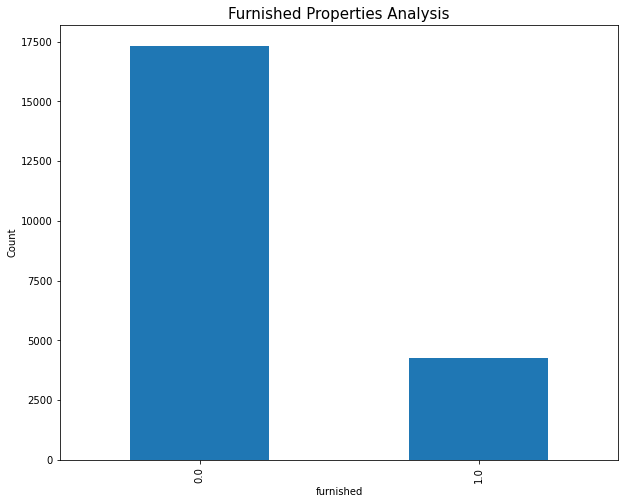

In [49]:
plt.figure(figsize=(10,8))
df['furnished'].value_counts().plot(kind='bar')
plt.title('furnished')
plt.xlabel('furnished')
plt.ylabel('Count')
plt.title("Furnished Properties Analysis", size=15)

In [50]:
df.furnished.value_counts()

0.0    17338
1.0     4246
Name: furnished, dtype: int64

Variable : living_measure15

Text(0.5, 0.98, 'living_measure15 Variable Anaylsis')

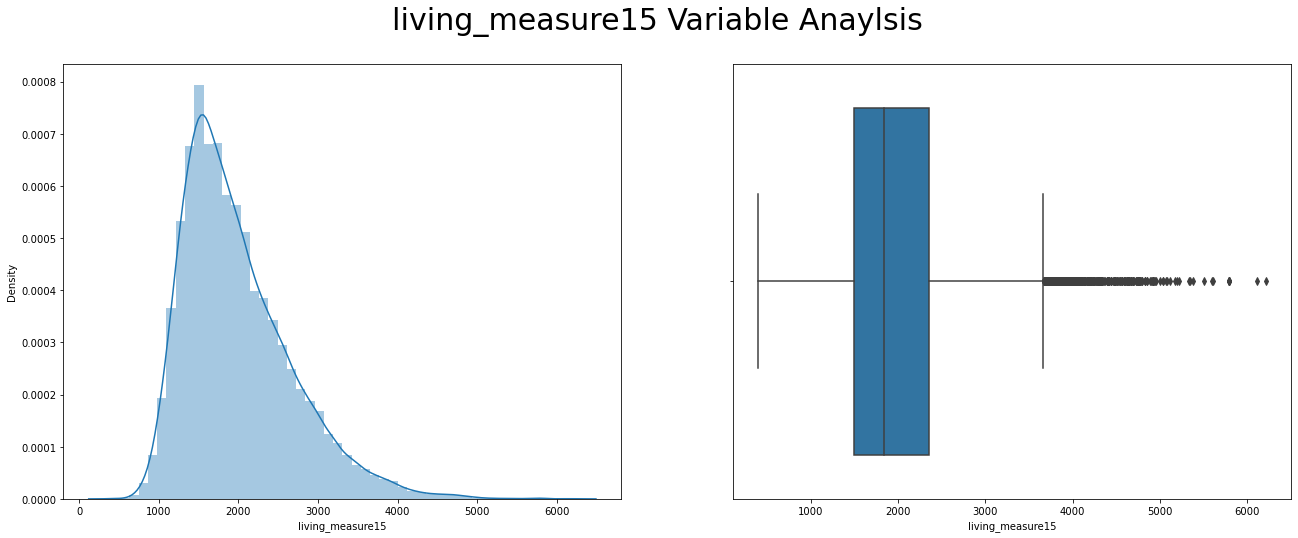

In [51]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['living_measure15'], ax=ax[0])
sns.boxplot(df['living_measure15'],  orient='h', ax=ax[1])
fig.suptitle("living_measure15 Variable Anaylsis", size=30)

In [52]:
df.living_measure15.value_counts()

1540.0    197
1440.0    193
1560.0    192
1500.0    178
1580.0    167
         ... 
1813.0      1
1336.0      1
2005.0      1
2049.0      1
1786.0      1
Name: living_measure15, Length: 774, dtype: int64

Variable : lot_measure15

Text(0.5, 0.98, 'lot_measure15 Variable Anaylsis')

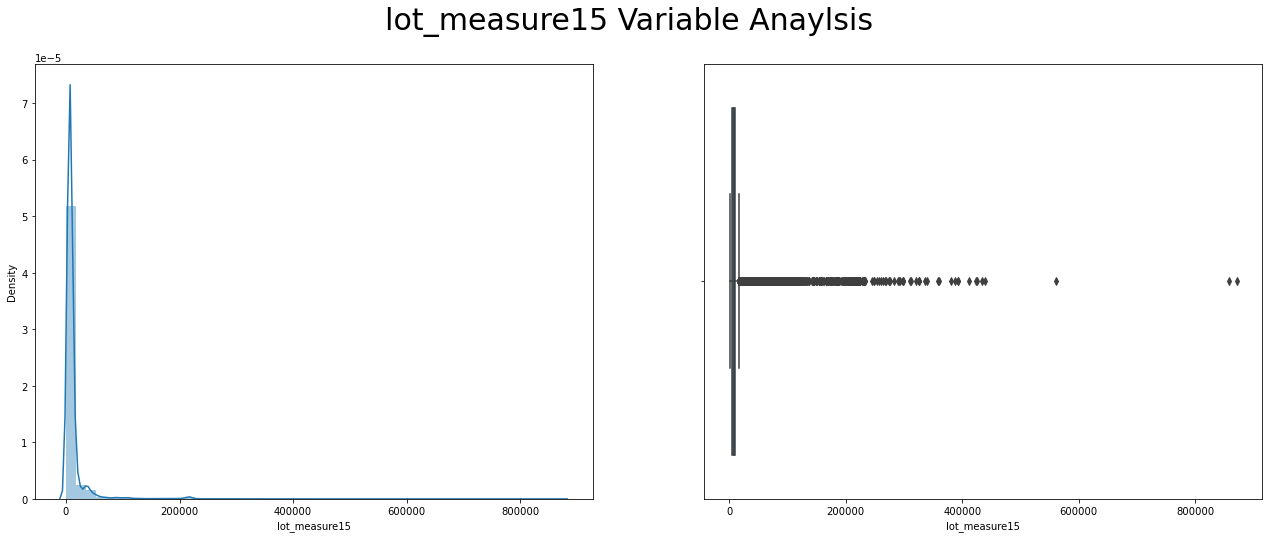

In [53]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['lot_measure15'], ax=ax[0])
sns.boxplot(df['lot_measure15'],  orient='h', ax=ax[1])
fig.suptitle("lot_measure15 Variable Anaylsis", size=30)

In [54]:
df.lot_measure15.value_counts()

5000.0    427
4000.0    357
6000.0    287
7200.0    211
4800.0    145
         ... 
4862.0      1
5228.0      1
9354.0      1
2378.0      1
7604.0      1
Name: lot_measure15, Length: 8682, dtype: int64

Variable : lat

Text(0.5, 0.98, 'lat Variable Anaylsis')

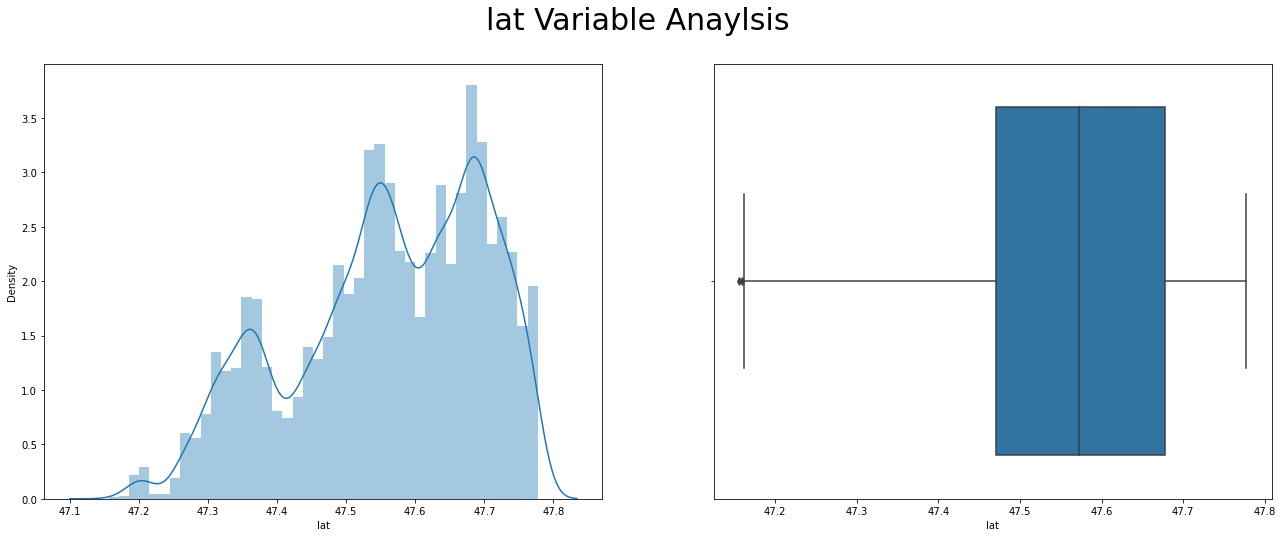

In [55]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['lat'], ax=ax[0])
sns.boxplot(df['lat'],  orient='h', ax=ax[1])
fig.suptitle("lat Variable Anaylsis", size=30)

In [56]:
df.lat.value_counts()

47.5491    17
47.6846    17
47.6624    17
47.5322    17
47.6711    16
           ..
47.6153     1
47.7582     1
47.2943     1
47.2939     1
47.3915     1
Name: lat, Length: 5034, dtype: int64

In [57]:
df.long.value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.474      1
-121.711      1
-121.845      1
-121.737      1
-121.947      1
Name: long, Length: 753, dtype: int64

In [58]:
df.total_area.describe()

count     21584
unique    11145
top           $
freq         39
Name: total_area, dtype: object

Analysis of room_bed

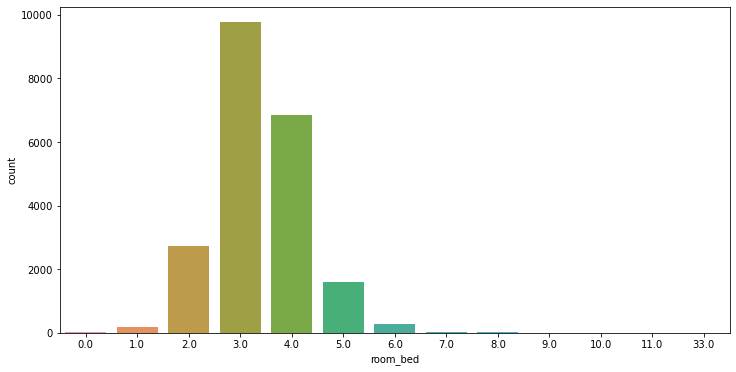

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(df.room_bed);

Analysis of room_bath

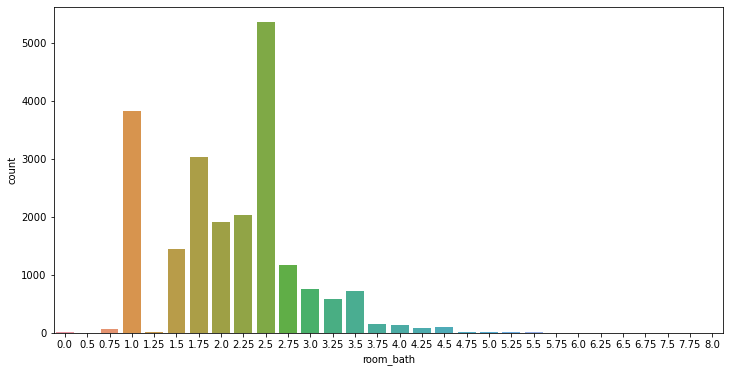

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(df.room_bath);

Analysis of Ceil

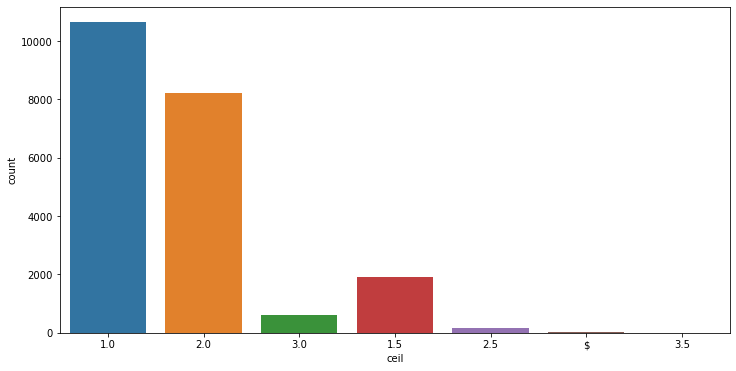

In [61]:
plt.figure(figsize=(12,6))
sns.countplot('ceil',data=df);

Analysis of Coast

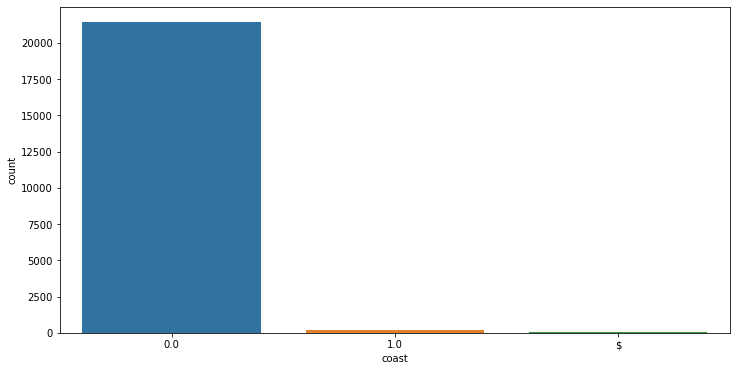

In [62]:
plt.figure(figsize=(12,6))
sns.countplot('coast',data=df);

Analysis of Sight

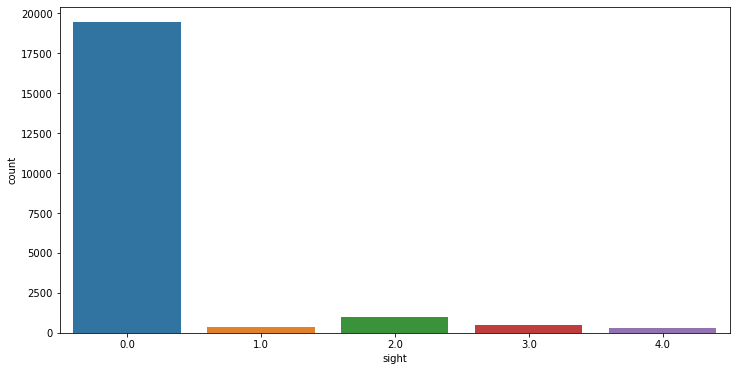

In [63]:
plt.figure(figsize=(12,6))
sns.countplot('sight',data=df);

Analysis of Condition

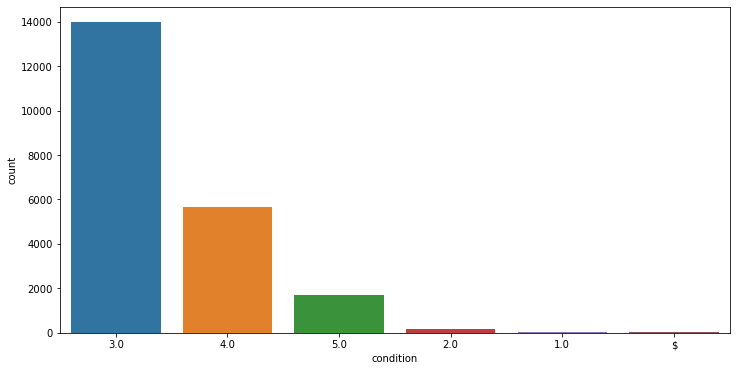

In [64]:
plt.figure(figsize=(12,6))
sns.countplot('condition',data=df);

Analysis of Quality

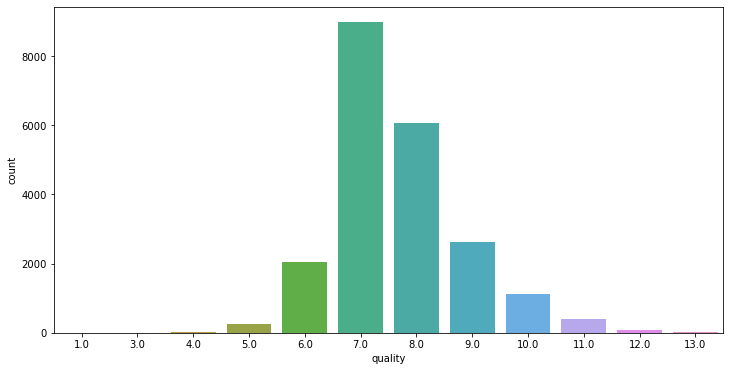

In [65]:
plt.figure(figsize=(12,6))
sns.countplot('quality',data=df);

Analysis of Furnished

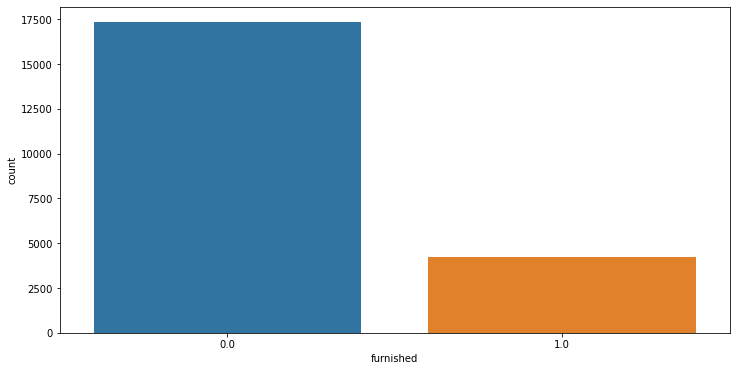

In [66]:
plt.figure(figsize=(12,6))
sns.countplot('furnished',data=df);

In [67]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

b) Bivariate analysis (relationship between different variables , correlations)

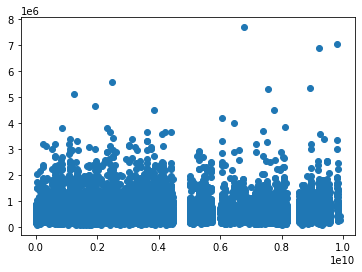

In [68]:
plt.scatter(df['cid'],df['price'])

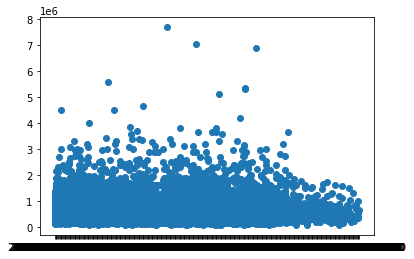

In [69]:
plt.scatter(df['dayhours'],df['price'])

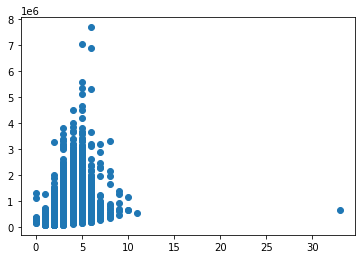

In [70]:
plt.scatter(df['room_bed'],df['price'])

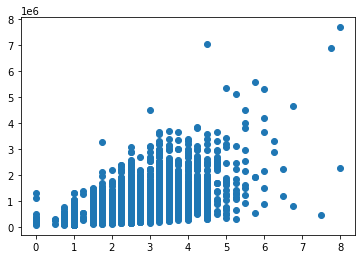

In [71]:
plt.scatter(df['room_bath'],df['price'])

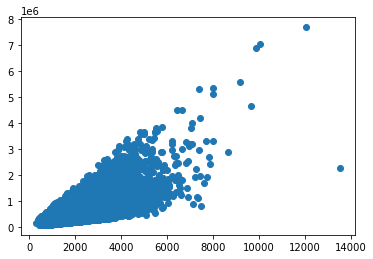

In [72]:
plt.scatter(df['living_measure'],df['price'])

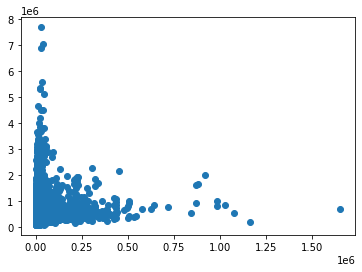

In [73]:
plt.scatter(df['lot_measure'],df['price'])

In [74]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

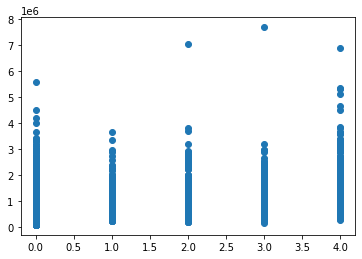

In [75]:
plt.scatter(df['sight'],df['price'])

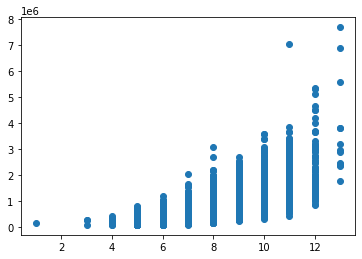

In [76]:
plt.scatter(df['quality'],df['price'])

In [77]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

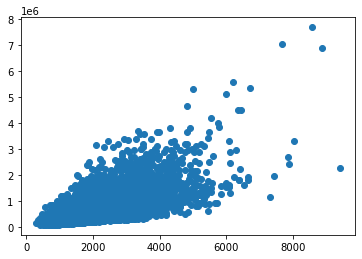

In [78]:
plt.scatter(df['ceil_measure'],df['price'])

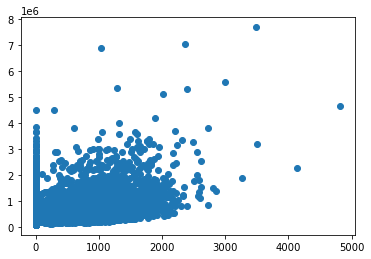

In [79]:
plt.scatter(df['basement'],df['price'])

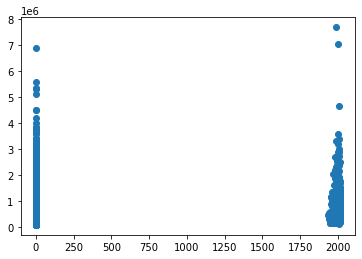

In [80]:
plt.scatter(df['year_renovated'],df['price'])

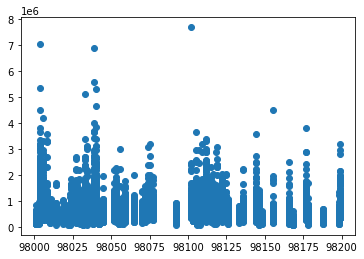

In [81]:
plt.scatter(df['zipcode'],df['price'])

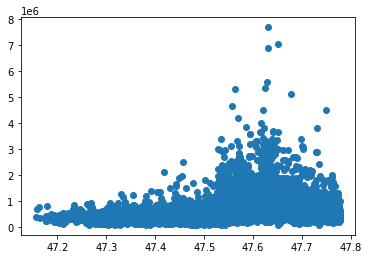

In [82]:
plt.scatter(df['lat'],df['price'])

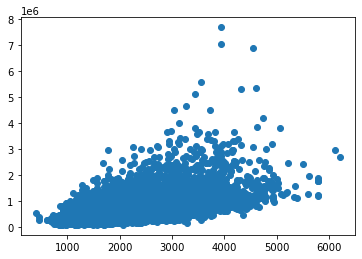

In [83]:
plt.scatter(df['living_measure15'],df['price'])

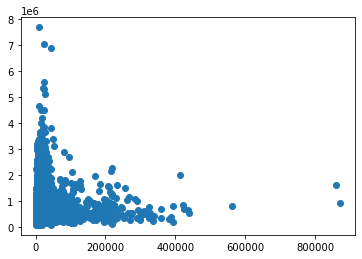

In [84]:
plt.scatter(df['lot_measure15'],df['price'])

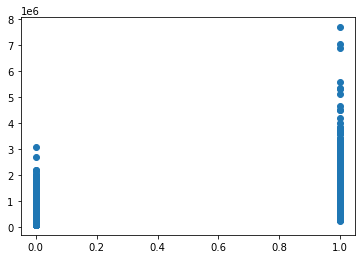

In [85]:
plt.scatter(df['furnished'],df['price'])

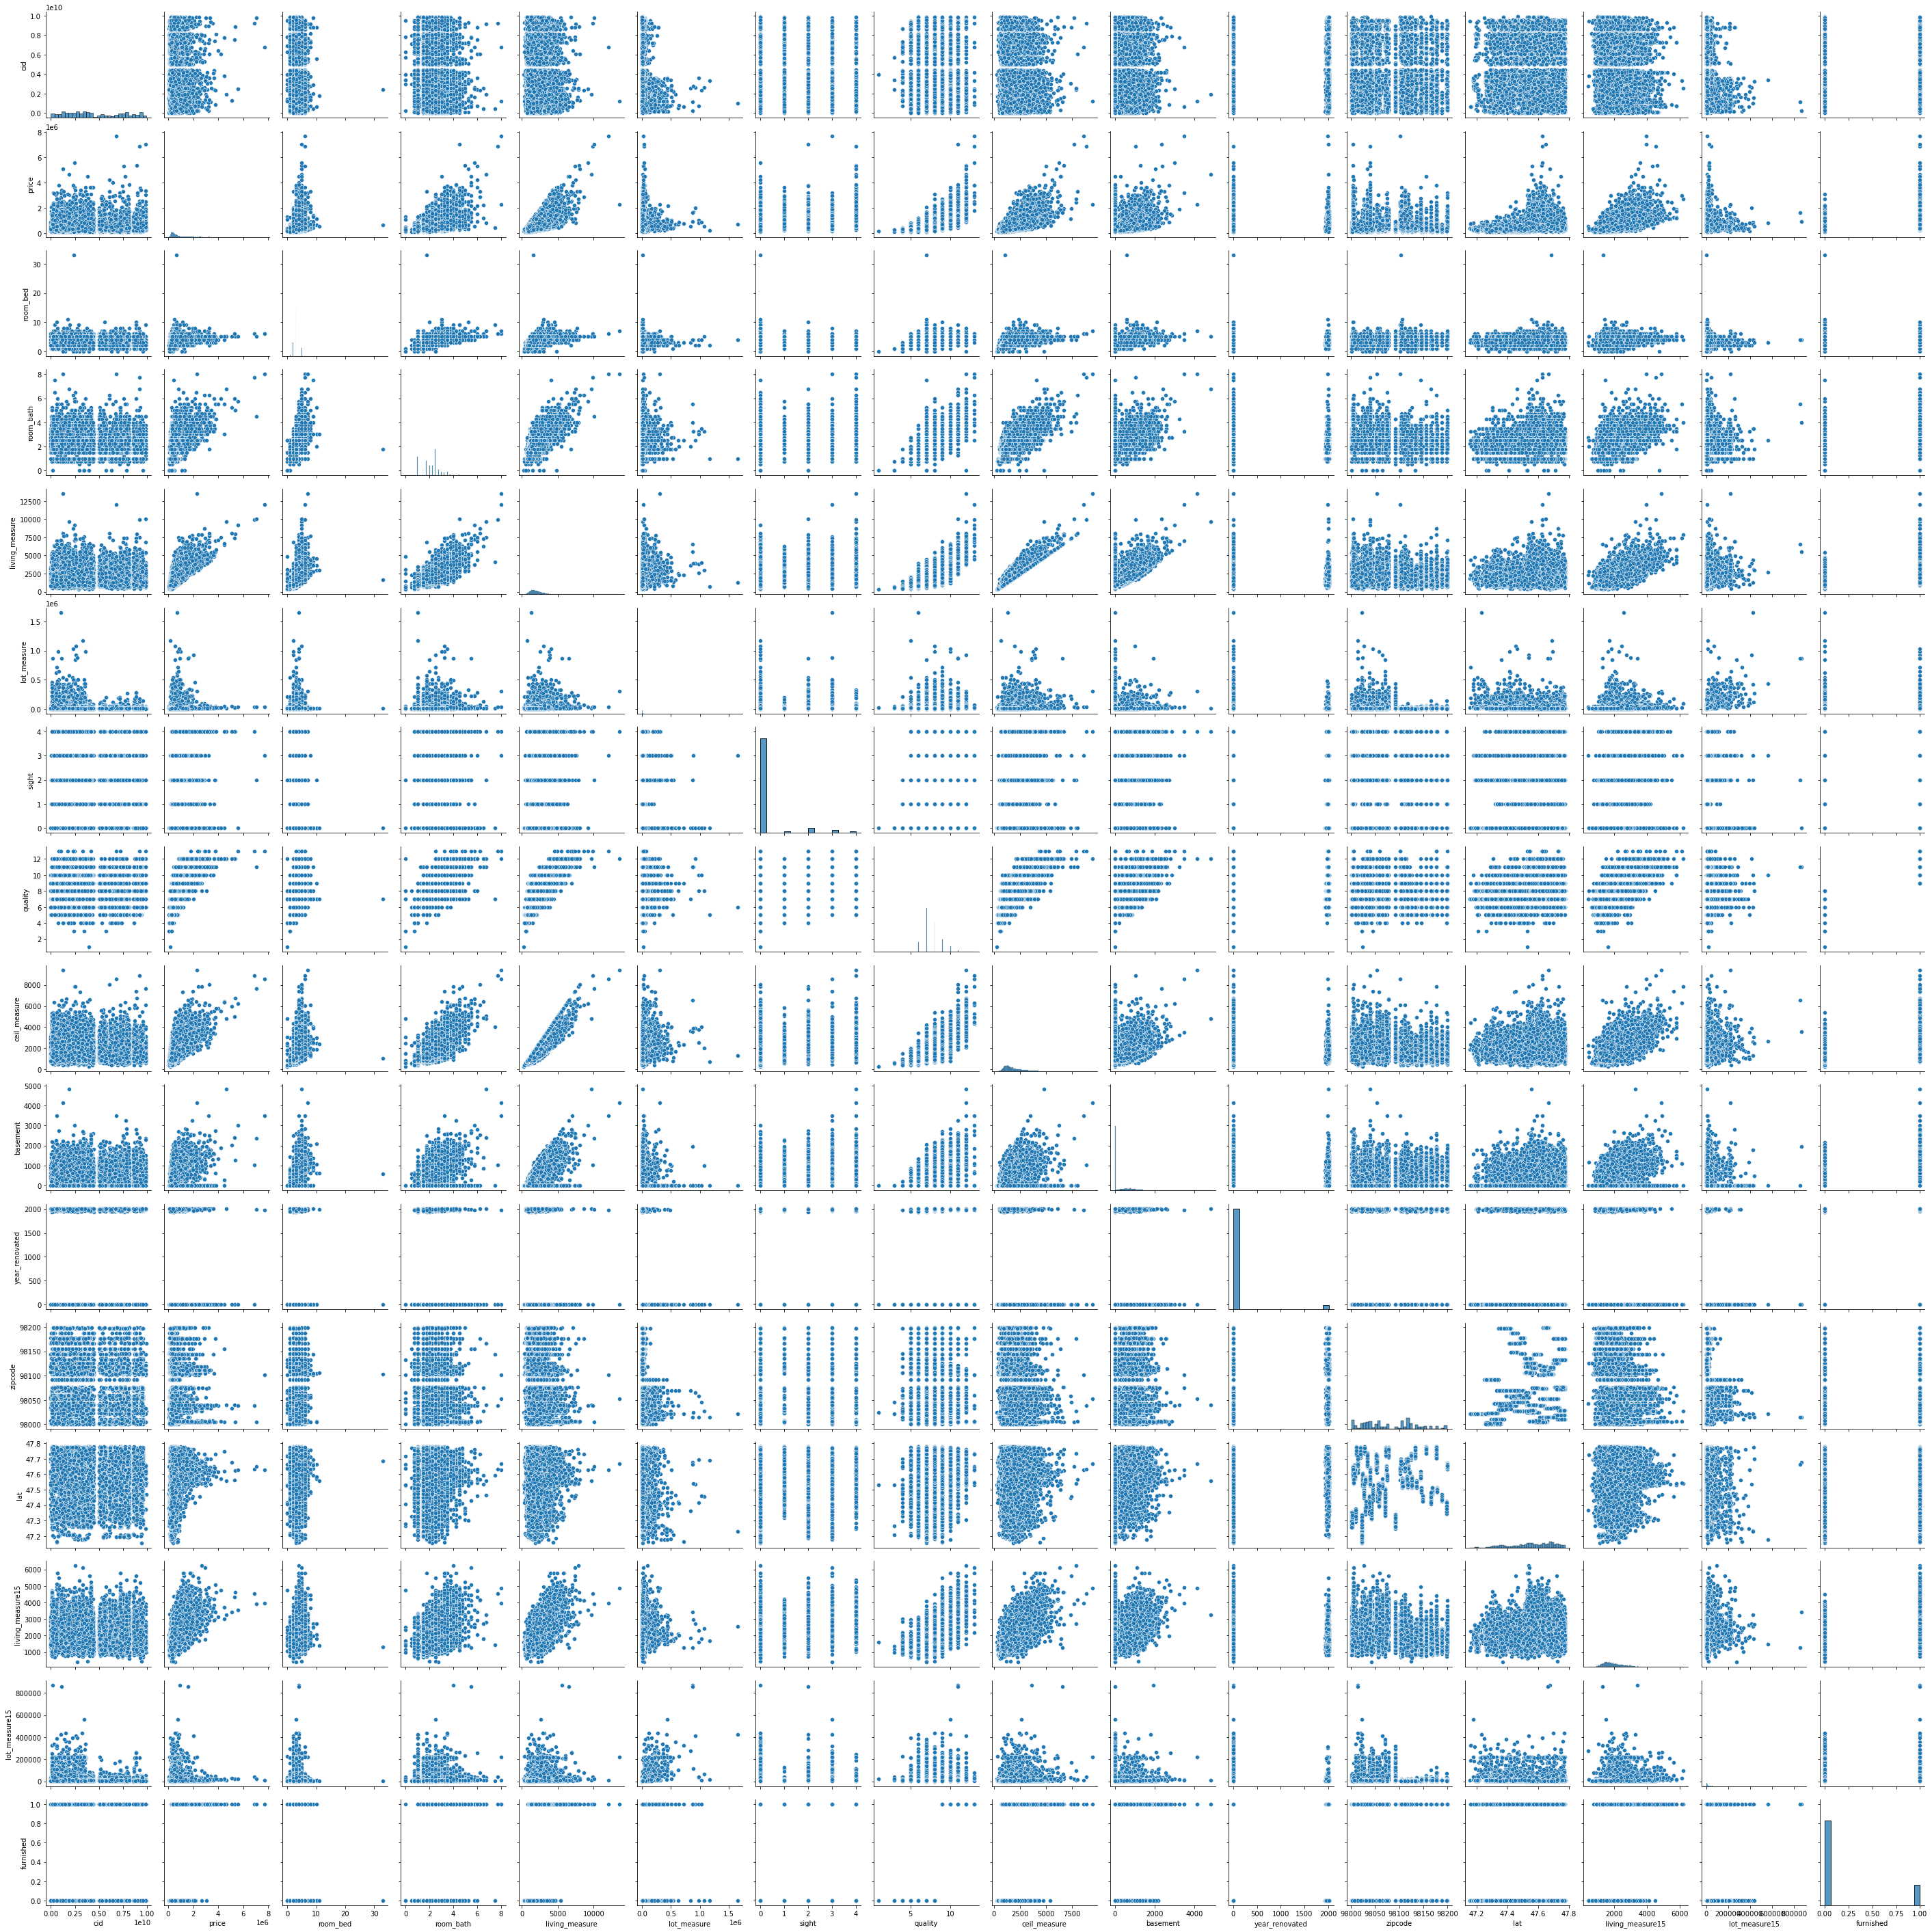

In [86]:
sns.pairplot(df)
plt.show()

Correlation

In [87]:
corr = df.corr()
corr

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.016797  0.001774   0.005660       -0.012130   
price            -0.016797  1.000000  0.308040   0.525179        0.702149   
room_bed          0.001774  0.308040  1.000000   0.515778        0.576447   
room_bath         0.005660  0.525179  0.515778   1.000000        0.754617   
living_measure   -0.012130  0.702149  0.576447   0.754617        1.000000   
lot_measure      -0.132043  0.089733  0.032051   0.088055        0.172958   
sight             0.012056  0.397522  0.078367   0.186939        0.284927   
quality           0.008140  0.667477  0.356740   0.665037        0.762723   
ceil_measure     -0.010821  0.605593  0.477708   0.685556        0.876653   
basement         -0.005174  0.323825  0.302569   0.283389        0.435035   
year_renovated   -0.016907  0.126442  0.018843   0.050194        0.055253   
zipcode          -0.008224 -0.053168 -0.152805  -0.204149       -0.199646   
lat              -0.001891  0.306919 -0.009125   0.024505        0.052764   
living_measure15 -0.002860  0.585186  0.390823   0.568001        0.756188   
lot_measure15    -0.138750  0.082603  0.029484   0.087096        0.183548   
furnished        -0.010013  0.566040  0.259316   0.485162        0.633157   

                  lot_measure     sight   quality  ceil_measure  basement  \
cid                 -0.132043  0.012056  0.008140     -0.010821 -0.005174   
price                0.089733  0.397522  0.667477      0.605593  0.323825   
room_bed             0.032051  0.078367  0.356740      0.477708  0.302569   
room_bath            0.088055  0.186939  0.665037      0.685556  0.283389   
living_measure       0.172958  0.284927  0.762723      0.876653  0.435035   
lot_measure          1.000000  0.075144  0.113869      0.183656  0.015400   
sight                0.075144  1.000000  0.251095      0.167572  0.277769   
quality              0.113869  0.251095  1.000000      0.755923  0.168403   
ceil_measure         0.183656  0.167572  0.755923      1.000000 -0.051925   
basement             0.015400  0.277769  0.168403     -0.051925  1.000000   
year_renovated       0.007782  0.103078  0.014417      0.023291  0.071317   
zipcode             -0.129423  0.084666 -0.184854     -0.261171  0.074820   
lat                 -0.086142  0.006160  0.114103     -0.000784  0.110508   
living_measure15     0.145653  0.280976  0.713114      0.731558  0.200068   
lot_measure15        0.717727  0.073020  0.119360      0.194246  0.017539   
furnished            0.119326  0.219995  0.788717      0.652616  0.092624   

                  year_renovated   zipcode       lat  living_measure15  \
cid                    -0.016907 -0.008224 -0.001891         -0.002860   
price                   0.126442 -0.053168  0.306919          0.585186   
room_bed                0.018843 -0.152805 -0.009125          0.390823   
room_bath               0.050194 -0.204149  0.024505          0.568001   
living_measure          0.055253 -0.199646  0.052764          0.756188   
lot_measure             0.007782 -0.129423 -0.086142          0.145653   
sight                   0.103078  0.084666  0.006160          0.280976   
quality                 0.014417 -0.184854  0.114103          0.713114   
ceil_measure            0.023291 -0.261171 -0.000784          0.731558   
basement                0.071317  0.074820  0.110508          0.200068   
year_renovated          1.000000  0.064357  0.029398         -0.002053   
zipcode                 0.064357  1.000000  0.267048         -0.279263   
lat                     0.029398  0.267048  1.000000          0.048822   
living_measure15       -0.002053 -0.279263  0.048822          1.000000   
lot_measure15           0.007950 -0.147479 -0.085936          0.184830   
furnished               0.017330 -0.138747  0.080947          0.620313   

                  lot_measure15  furnished  
cid                   -0.138750  -0.010013  
price                  0.082603   0.566040  
room_bed 

Heatmap

<AxesSubplot:>

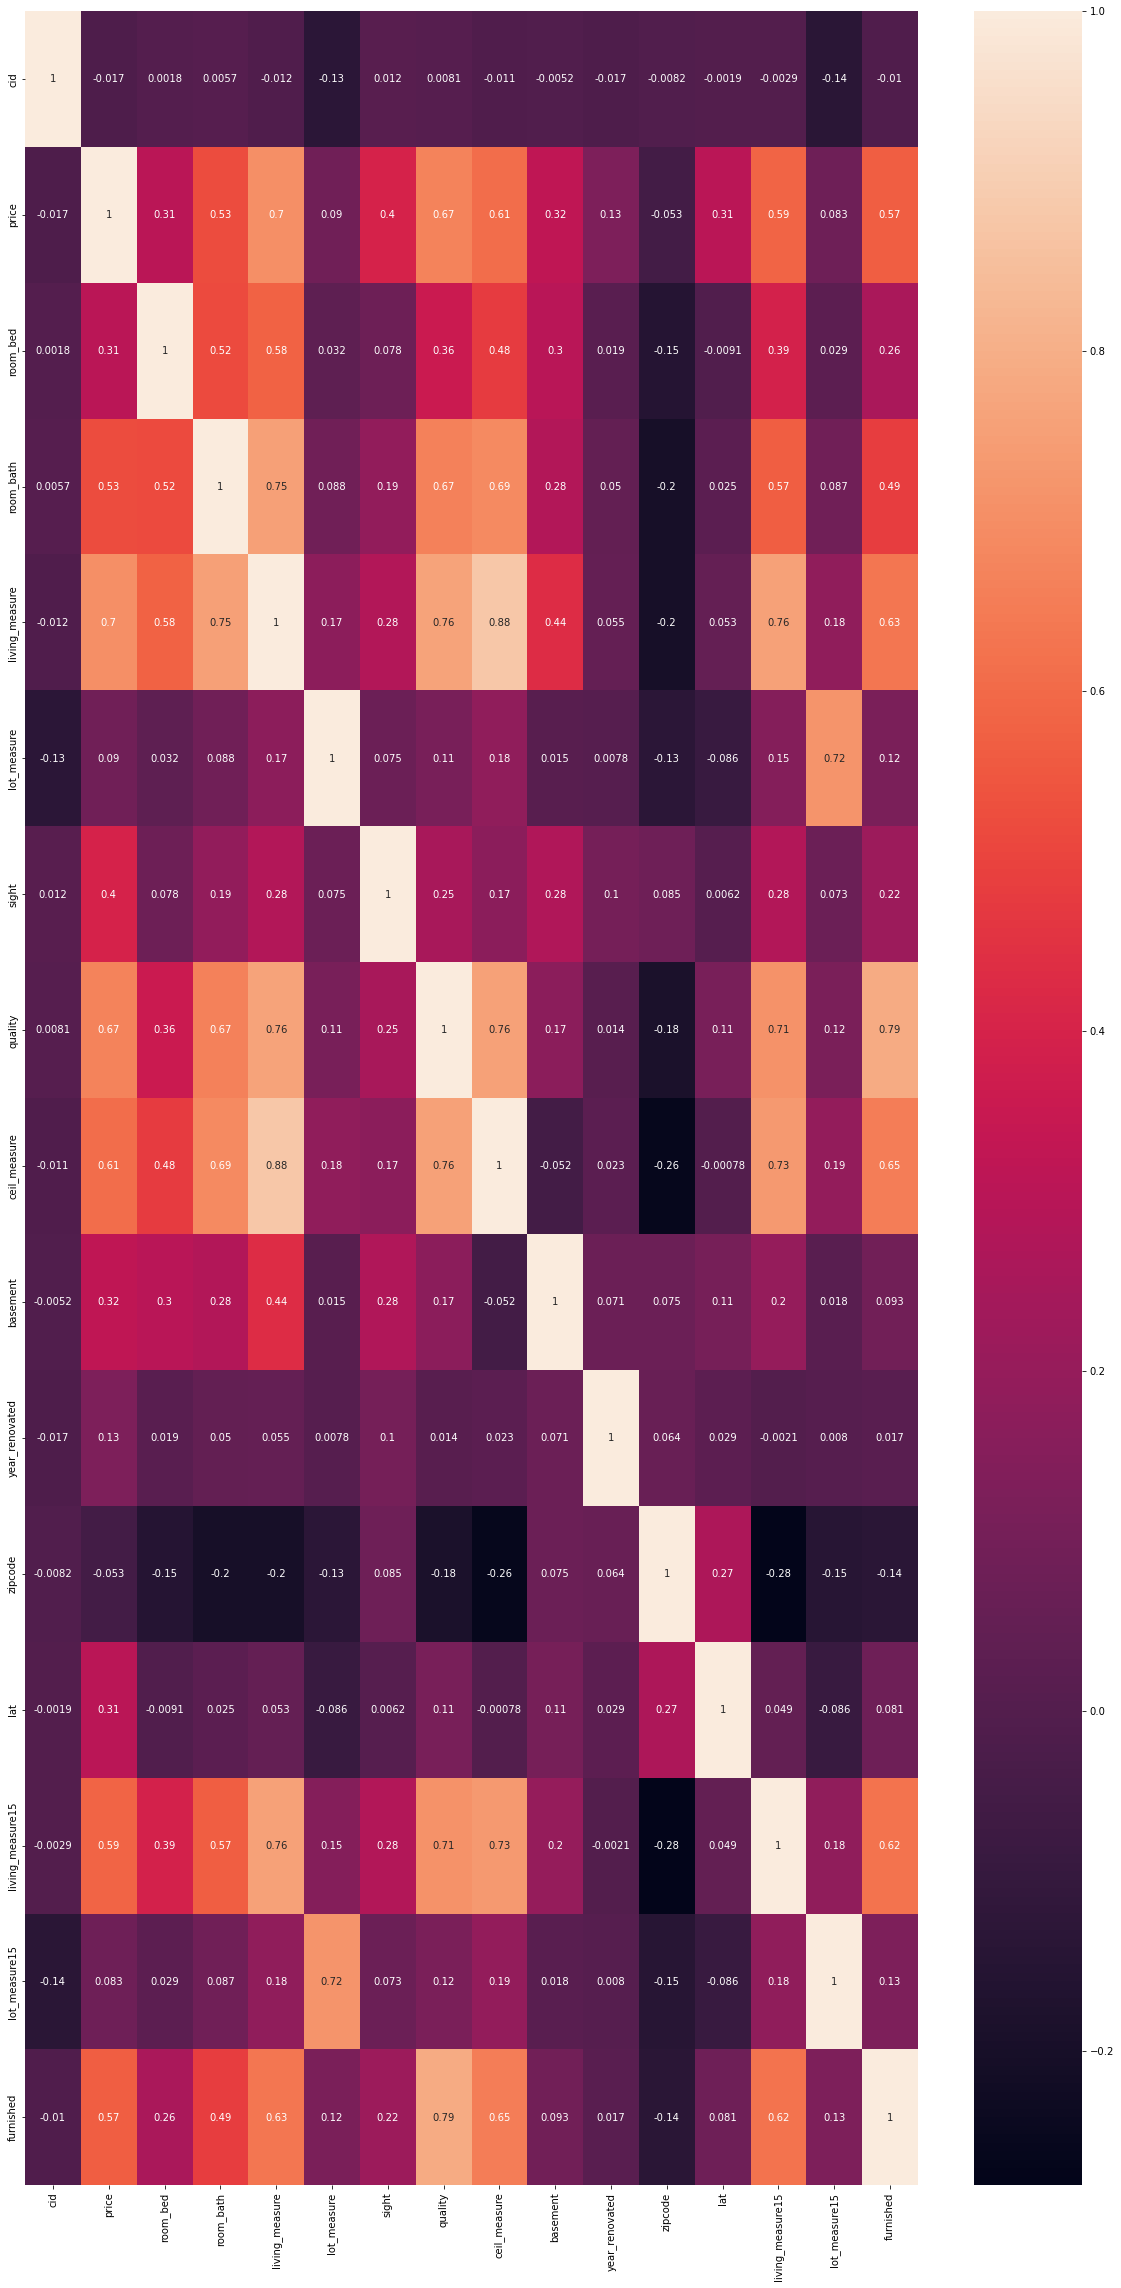

In [88]:
plt.figure(figsize=(20,40))
sns.heatmap(corr, annot=True)

b) Missing Value treatment (if applicable)

In [89]:
df.duplicated().sum()

0

Checking for Null values

In [90]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
year_built            1
year_renovated        0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [91]:
df.dtypes

cid                 float64
dayhours             object
price               float64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
year_built           object
year_renovated      float64
zipcode             float64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [92]:
df['room_bed'] = df['room_bed'].fillna(df['room_bed'].median())

In [93]:
df['room_bath'] = df['room_bath'].fillna(df['room_bath'].median())

In [94]:
df['living_measure'] = df['living_measure'].fillna(df['living_measure'].median())

In [95]:
df['lot_measure'] = df['lot_measure'].fillna(df['lot_measure'].median())

In [96]:
df['ceil'] = df['ceil'].fillna(df['ceil'].mode())

In [97]:
df['sight'] = df['sight'].fillna(df['sight'].median())

In [98]:
df['condition'] = df['condition'].fillna(df['condition'].mode())

In [99]:
df['quality'] = df['quality'].fillna(df['quality'].median())

In [100]:
df['basement'] = df['basement'].fillna(df['basement'].median())

In [101]:
df['year_built'] = df['year_built'].fillna(df['year_built'].mode())

In [102]:
df['living_measure15'] = df['living_measure15'].fillna(df['living_measure15'].median())

In [103]:
df['lot_measure15'] = df['lot_measure15'].fillna(df['lot_measure15'].median())

In [104]:
df['furnished'] = df['furnished'].fillna(df['furnished'].median())

In [105]:
df['total_area'] = df['total_area'].fillna(df['living_measure'] + df['living_measure'])

In [106]:
df.isnull().sum()

cid                  0
dayhours             0
price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                42
coast                1
sight                0
condition           57
quality              0
ceil_measure         1
basement             0
year_built           1
year_renovated       0
zipcode              0
lat                  0
long                 0
living_measure15     0
lot_measure15        0
furnished            0
total_area           0
dtype: int64

In [107]:
df['lot_measure'] = df['lot_measure'].fillna(df['lot_measure'].median())

In [108]:
df['ceil'] = df['ceil'].fillna(df['ceil'].mode()[0])

In [109]:
df['coast'] = df['coast'].fillna(df['coast'].mode()[0])

In [110]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

In [111]:
df['ceil_measure'] = df['ceil_measure'].fillna(df['ceil_measure'].median())

In [112]:
df['year_built'] = df['year_built'].fillna(df['year_built'].mode()[0])

In [113]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
year_built          0
year_renovated      0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

d) Outlier treatment (if required)

In [114]:
df_num= df.select_dtypes(include=['float64','int64'])

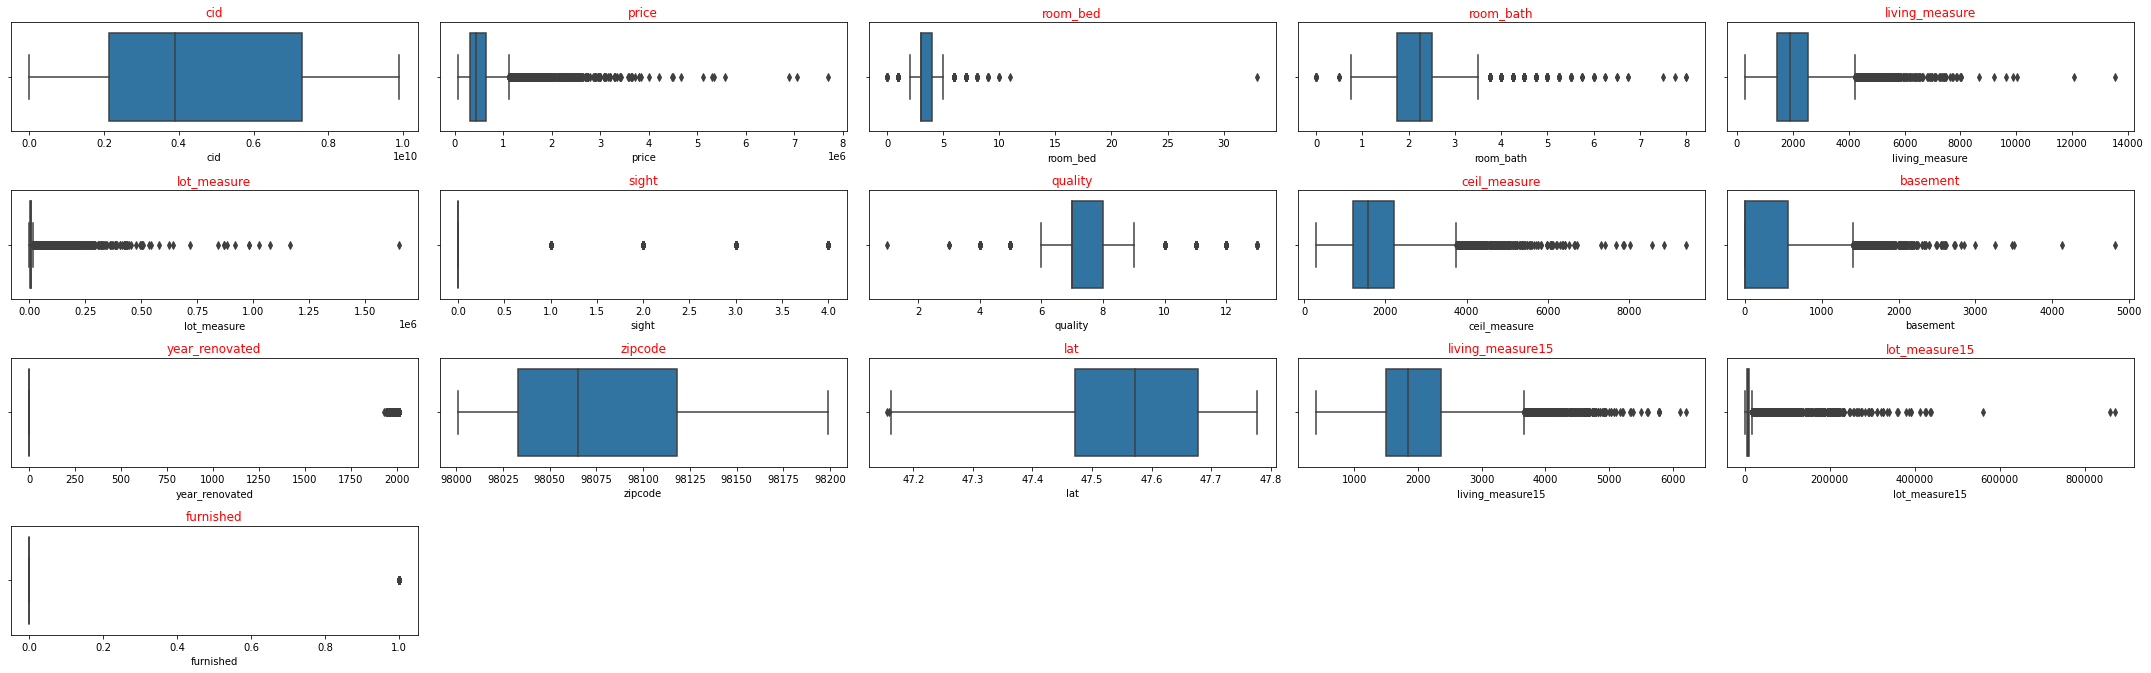

In [115]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [116]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [117]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [118]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

After removing Outliers

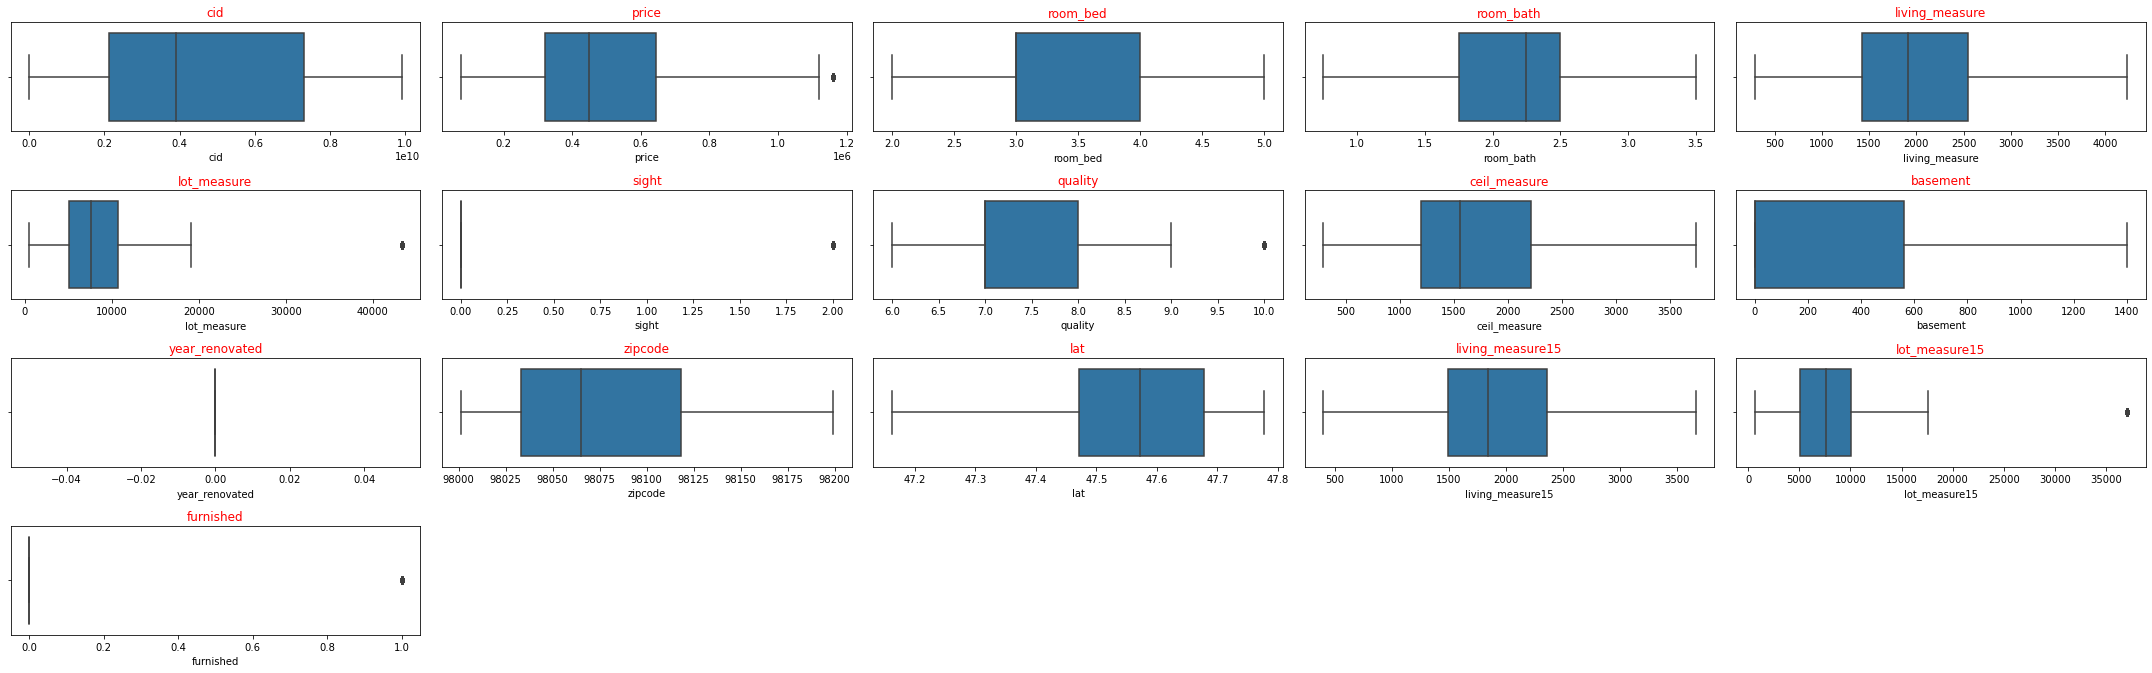

In [119]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

e) Variable transformation (if applicable)

In [120]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [121]:
df.cid.unique()

array([3.87610094e+09, 3.14560025e+09, 7.12930307e+09, ...,
       4.24069018e+08, 7.25820006e+09, 8.80590043e+09])

In [122]:
df['cid'].sort_values().unique().shape

(21436,)

In [123]:
df.dayhours.unique()

array(['20150427T000000', '20150317T000000', '20140820T000000',
       '20141010T000000', '20150218T000000', '20140709T000000',
       '20140715T000000', '20140618T000000', '20140721T000000',
       '20141028T000000', '20140502T000000', '20150123T000000',
       '20141029T000000', '20150311T000000', '20140822T000000',
       '20140522T000000', '20140819T000000', '20150428T000000',
       '20150212T000000', '20140909T000000', '20141125T000000',
       '20140818T000000', '20140719T000000', '20141230T000000',
       '20150112T000000', '20140829T000000', '20150501T000000',
       '20140811T000000', '20141103T000000', '20140620T000000',
       '20141203T000000', '20141030T000000', '20141208T000000',
       '20140903T000000', '20140610T000000', '20150422T000000',
       '20140625T000000', '20150222T000000', '20150113T000000',
       '20140923T000000', '20140624T000000', '20150128T000000',
       '20141014T000000', '20150316T000000', '20140912T000000',
       '20140606T000000', '20141017T0000

In [124]:
df['dayhours'].sort_values().unique().shape

(372,)

In [125]:
df.price.unique()

array([600000., 190000., 735000., ..., 725126., 332100., 685530.])

In [126]:
df['price'].sort_values().unique().shape

(3625,)

In [127]:
df.room_bed.unique()

array([ 4.,  2.,  3.,  1.,  5.,  6.,  7., 10.,  8.,  0.,  9., 33., 11.])

In [128]:
df['room_bed'].sort_values().unique().shape

(13,)

In [129]:
df.room_bath.unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25, 6.  ,
       0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [130]:
df['room_bath'].sort_values().unique().shape

(30,)

In [131]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [132]:
df.living_measure.unique()

array([3050.,  670., 3040., ..., 1405., 1295., 2253.])

In [133]:
df['living_measure'].sort_values().unique().shape

(1038,)

In [134]:
df.lot_measure.unique()

array([ 9440.,  3101.,  2415., ..., 12369.,  2332., 60467.])

In [135]:
df['lot_measure'].sort_values().unique().shape

(9765,)

In [136]:
df.ceil.unique()

array([1.0, 2.0, 3.0, 1.5, 2.5, '$', 3.5], dtype=object)

In [137]:
df.coast.unique()

array([0.0, 1.0, '$'], dtype=object)

In [138]:
df.sight.unique()

array([0., 4., 2., 3., 1.])

In [139]:
df['sight'].sort_values().unique().shape

(5,)

In [140]:
df.condition.unique()

array([3.0, 4.0, 5.0, 2.0, 1.0, '$'], dtype=object)

In [141]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [142]:
df.quality.unique()

array([ 8.,  6.,  7., 10.,  9.,  5., 11., 13.,  4., 12.,  1.,  3.])

In [143]:
df['quality'].sort_values().unique().shape

(12,)

In [144]:
df.ceil_measure.unique()

array([1800.,  670., 3040., 1740., 1120., 1610., 1140., 3360., 3100.,
       1460., 3310., 1520., 2450., 1390.,  910., 1450., 1040., 1200.,
       1570., 1940., 2170., 1750., 1430., 1220., 2790.,  720., 1180.,
        950., 2470., 3220.,  900., 1420., 1870., 2920., 1100., 1440.,
       2360., 3000., 1130., 2156., 1170., 1300., 1340., 2820., 2290.,
       1070.,  800., 1550., 2200., 1230., 2305., 1270., 1540., 1890.,
       1060., 1620., 2670., 1980., 1760., 1150., 1470., 1160., 2270.,
       3500., 1950.,  750., 3290., 3240., 1320., 1769., 1790.,  830.,
       1290., 1010., 1910., 2110., 2460., 3550., 1330., 1280., 1480.,
       2040., 2150., 3140., 1370., 1400., 2740., 2020., 2530., 1260.,
       3370.,  870., 1500., 1240., 1810., 2190.,  890.,  630., 1410.,
       2180., 3460., 4160., 1830., 1380., 1530., 2610., 3180.,  880.,
       1690., 1930., 1190., 1600., 2240., 2210., 2750., 3440., 1000.,
       5110., 1757., 1900., 1050., 3480.,  740., 3820., 1990.,  970.,
       1490., 3080.,

In [145]:
df['ceil_measure'].sort_values().unique().shape

(946,)

In [146]:
df.basement.unique()

array([1250.,    0., 1320., 1000.,  480.,  610., 1050.,  700.,  430.,
        560.,  250.,  670.,  570.,  290.,  600.,  680.,  380.,   50.,
       1020.,  690., 1010.,  530., 1370., 1040.,  790.,  910.,  820.,
       1850.,  500.,  760.,  960.,  340.,  800.,  580., 1600., 1680.,
        900.,  420.,  450.,  200.,  240.,  950., 1590., 1220., 1500.,
        710.,   80.,  140., 1260.,  860.,  890.,  280.,  440.,  880.,
        220., 1650.,  630.,  780.,  810.,  300.,  720.,  470.,  150.,
       1180., 1060.,  120.,  660.,  400., 1100., 1780.,  640., 1170.,
       1890.,  130.,  550.,  360.,  940.,  650., 2730.,  870.,  730.,
       1350., 1530., 1540.,  620., 1080., 1900.,  770.,  520.,  920.,
       1110.,  830., 1420.,  980.,  190.,  330.,  350.,  740., 1570.,
        990., 1390.,  260.,  540., 1300.,  265., 1120.,  460.,  370.,
       1830., 1140.,  270.,  145.,  510.,  750., 1710.,  930., 1870.,
       1200.,  310.,  850.,  506.,  970., 1070., 1450.,  840.,   90.,
       3500., 1380.,

In [147]:
df['basement'].sort_values().unique().shape

(306,)

In [148]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [149]:
df.year_built.unique()

array([1966.0, 1948.0, 2009.0, 1924.0, 1994.0, 2005.0, 1978.0, 1983.0,
       2012.0, 1912.0, 1990.0, 1967.0, 1919.0, 1908.0, 1950.0, 2000.0,
       2013.0, 1943.0, 1922.0, 1977.0, 2004.0, 1935.0, 1964.0, 1945.0,
       1987.0, 2008.0, 1940.0, 2003.0, 1988.0, 1985.0, 1998.0, 1995.0,
       1946.0, 1984.0, 1958.0, 1963.0, 1942.0, 2014.0, 1971.0, 1936.0,
       1954.0, 1923.0, 2002.0, 1972.0, 2007.0, 1930.0, 1962.0, 1999.0,
       1953.0, 1965.0, 2010.0, 1997.0, 2006.0, 1979.0, 1996.0, 1992.0,
       1968.0, 1980.0, 1981.0, 1969.0, 2001.0, 1929.0, 1952.0, 1916.0,
       1976.0, 1974.0, 1920.0, 1931.0, 1975.0, 1960.0, 1900.0, '$',
       1986.0, 1989.0, 1906.0, 1955.0, 1956.0, 1915.0, 1941.0, 1993.0,
       2011.0, 1925.0, 1947.0, 1991.0, 1926.0, 1927.0, 1951.0, 1961.0,
       1932.0, 1917.0, 1928.0, 1959.0, 1921.0, 1911.0, 1949.0, 1982.0,
       1913.0, 1957.0, 1914.0, 1938.0, 1973.0, 1937.0, 1944.0, 1970.0,
       1901.0, 1907.0, 1939.0, 1918.0, 1934.0, 1904.0, 2015.0, 1909.0,
       19

In [150]:
df.year_renovated.unique()

array([   0., 1993., 2014., 1983., 1992., 2000., 2011., 1994., 2009.,
       1944., 1971., 2003., 1955., 1985., 2008., 2015., 2005., 1979.,
       1998., 1968., 2010., 1989., 2002., 1987., 1999., 1996., 1940.,
       1986., 1988., 1969., 1995., 2004., 2007., 2013., 2001., 1990.,
       1958., 2012., 1967., 1991., 1970., 1984., 2006., 1982., 1951.,
       1960., 1956., 1997., 1980., 1959., 1974., 1973., 1975., 1981.,
       1963., 1957., 1976., 1948., 1945., 1977., 1978., 1972., 1965.,
       1964., 1953., 1950., 1962., 1946., 1934., 1954.])

In [151]:
df['year_renovated'].sort_values().unique().shape

(70,)

In [152]:
df.zipcode.unique()

array([98034., 98118., 98002., 98030., 98103., 98006., 98042., 98031.,
       98065., 98109., 98058., 98001., 98105., 98115., 98032., 98033.,
       98199., 98053., 98056., 98102., 98038., 98092., 98003., 98075.,
       98059., 98008., 98011., 98014., 98023., 98116., 98198., 98126.,
       98052., 98108., 98133., 98074., 98077., 98106., 98045., 98146.,
       98155., 98117., 98027., 98040., 98072., 98005., 98055., 98070.,
       98028., 98166., 98019., 98136., 98107., 98004., 98125., 98112.,
       98024., 98177., 98122., 98168., 98029., 98007., 98178., 98010.,
       98188., 98039., 98144., 98022., 98148., 98119.])

In [153]:
df['zipcode'].sort_values().unique().shape

(70,)

In [154]:
df.lat.unique()

array([47.7228, 47.5546, 47.5188, ..., 47.4178, 47.7594, 47.3915])

In [155]:
df['lat'].sort_values().unique().shape

(5034,)

In [156]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [157]:
df.long.unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, '$', -122.333,
       -122.165, -122.15, -122.178, -121.87, -122.352, -122.122, -122.275,
       -122.234, -122.324, -122.321, -122.277, -122.196, -122.398,
       -122.019, -122.181, -122.325, -122.191, -122.026, -122.084, -122.3,
       -122.287, -122.011, -122.127, -122.281, -122.221, -121.859,
       -121.913, -122.39, -121.871, -122.013, -122.381, -122.279,
       -122.194, -122.201, -122.125, -122.379, -122.121, -122.024,
       -122.389, -122.305, -122.346, -122.375, -122.344, -122.028,
       -122.193, -122.209, -122.365, -122.28, -122.334, -122.149,
       -122.388, -122.016, -122.298, -122.153, -121.802, -121.878,
       -122.218, -122.359, -122.296, -122.361, -122.357, -122.309,
       -122.056, -121.974, -122.18, -122.331, -122.374, -121.976,
       -121.975, -122.216, -122.188, -122.391, -122.31, -122.302,
       -121.972, -122.22, -122.17, -122.101, -121.888, -122.046, -122.154,
       -122.145, -122.236, -122.168, 

In [158]:
df.living_measure15.unique()

array([2020., 1660., 2620., 2030., 1120., 1610., 1170., 2800., 1850.,
       1460., 2380., 1880., 2440., 1390., 1060., 1280., 1540., 1200.,
       3050., 1410., 2300., 1440., 1710., 2850., 1860., 1830., 1550.,
       2490., 3330., 1350., 2040., 3100., 1790., 2420., 3000., 1870.,
       1730., 1708., 1670., 1510., 1480., 2820., 1090., 1160., 1220.,
       2710., 1240., 1320., 2120., 1500., 1450., 2400., 2050., 1380.,
       2070., 1820., 1620., 1268., 2260., 3110., 1890., 1260., 3380.,
       1680., 2502., 1340., 1800., 1180., 2650., 2450., 3730., 2110.,
       2990., 3920., 2330., 2060., 2520., 1330., 1780., 2150., 2790.,
       2080., 1650., 2530., 1760., 2900.,  870., 1770., 2190., 1270.,
       3140., 1140., 1720., 2214., 3340., 2540., 3400., 1840., 2610.,
       1400., 3130., 1530., 1690., 2580., 1990., 3390., 3800., 2140.,
        910., 1560., 1150., 4110., 2510., 1050., 3360., 1490., 3010.,
       2130., 3450., 2740., 2200., 2100., 2360., 1580., 3630., 1100.,
       1020., 1930.,

In [159]:
df['living_measure15'].sort_values().unique().shape

(774,)

In [160]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [161]:
df.lot_measure15.unique()

array([ 8660.,  4100.,  2433., ..., 11491.,  2853.,  7604.])

In [162]:
df['lot_measure15'].sort_values().unique().shape

(8682,)

In [163]:
df.furnished.unique()

array([0., 1.])

In [164]:
df['furnished'].sort_values().unique().shape

(2,)

In [165]:
df.total_area.unique()

array([12490.0, 3771.0, 5455.0, ..., 16111.0, 63597.0, 38122.0],
      dtype=object)

In [166]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [167]:
df[["ceil","coast","condition","year_built","total_area","long"]] = df[["ceil","coast","condition","year_built","total_area","long"]].astype(str)

In [168]:
df["total_area"] = df["total_area"].apply(lambda x: x.replace("$","nan"))

In [169]:
df["ceil"] = df["ceil"].apply(lambda x: x.replace("$","nan"))

In [170]:
df["coast"] = df["coast"].apply(lambda x: x.replace("$","nan"))

In [171]:
df["condition"] = df["condition"].apply(lambda x: x.replace("$","nan"))

In [172]:
df["year_built"] = df["year_built"].apply(lambda x: x.replace("$","nan"))

In [173]:
df["long"] = df["long"].apply(lambda x: x.replace("$","nan"))

In [174]:
df["dayhours"] = df["dayhours"].str.replace('T000000', "")

In [175]:
Imputer = KNNImputer(n_neighbors = 2)
df1 = Imputer.fit_transform(df[["dayhours","price","room_bed","room_bath","living_measure","lot_measure","ceil","coast","sight","condition",
                                "quality","ceil_measure","basement","year_built","year_renovated","living_measure15","lot_measure15","furnished",
                                "total_area",'lat','long','zipcode']])

In [176]:
df = pd.DataFrame(df1, columns = ["dayhours","price","room_bed","room_bath","living_measure","lot_measure","ceil","coast","sight","condition",
                                  "quality","ceil_measure","basement","year_built","year_renovated","living_measure15","lot_measure15","furnished",
                                  "total_area",'lat','long','zipcode'])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          21613 non-null  float64
 1   price             21613 non-null  float64
 2   room_bed          21613 non-null  float64
 3   room_bath         21613 non-null  float64
 4   living_measure    21613 non-null  float64
 5   lot_measure       21613 non-null  float64
 6   ceil              21613 non-null  float64
 7   coast             21613 non-null  float64
 8   sight             21613 non-null  float64
 9   condition         21613 non-null  float64
 10  quality           21613 non-null  float64
 11  ceil_measure      21613 non-null  float64
 12  basement          21613 non-null  float64
 13  year_built        21613 non-null  float64
 14  year_renovated    21613 non-null  float64
 15  living_measure15  21613 non-null  float64
 16  lot_measure15     21613 non-null  float6

f) Addition of new variables (if required)

In [178]:
df["house_land_ratio"]=np.round((df['living_measure']/df['total_area']),2)*100
df["house_land_ratio"].head()

0    24.0
1    18.0
2    56.0
3    32.0
4    20.0
Name: house_land_ratio, dtype: float64

4) Business insights from EDA 

Any business insights using clustering (if applicable)

In [179]:
df_pca = df.drop(["dayhours","lat","long","zipcode","year_built","year_renovated"], axis=1)

In [180]:
df_pca.head(5)

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000.0       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000.0       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000.0       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000.0       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000.0       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  living_measure15  \
0    0.0        3.0      8.0        1800.0    1250.0            2020.0   
1    0.0        4.0      6.0         670.0       0.0            1660.0   
2    4.0        3.0      8.0        3040.0       0.0            2620.0   
3    0.0        3.0      8.0        1740.0       0.0            2030.0   
4    0.0        3.0      7.0        1120.0       0.0            1120.0   

   lot_measure15  furnished  total_area  house_land_ratio  
0         8660.0        0.0     12490.0              24.0  
1         4100.0        0.0      3771.0              18.0  
2         2433.0        0.0      5455.0              56.0  
3         3794.0        0.0      5461.0              32.0  
4         5100.0        0.0      5710.0              20.0

Hierarchical clustering

In [181]:
df_scaled = df_pca.apply(zscore)
df_scaled.head()

price  room_bed  room_bath  living_measure  lot_measure      ceil  \
0  0.162834  0.679192  -0.476136        1.056797    -0.136528 -0.913871   
1 -0.953256 -1.475263  -1.452238       -1.535440    -0.289704 -0.913871   
2  0.530328  0.679192   0.825334        1.045905    -0.306281  0.938773   
3 -0.770871 -0.398035   0.499967       -0.370022    -0.274722  0.938773   
4 -0.245491 -1.475263  -1.452238       -1.045311    -0.253724 -0.913871   

       coast     sight  condition   quality  ceil_measure  basement  \
0  -0.086632 -0.305352  -0.627914  0.291953      0.014062  2.165764   
1  -0.086632 -0.305352   0.910673 -1.409540     -1.350564 -0.658681   
2  11.543060  4.919970  -0.627914  0.291953      1.511527 -0.658681   
3  -0.086632 -0.305352  -0.627914  0.291953     -0.058396 -0.658681   
4  -0.086632 -0.305352  -0.627914 -0.558793     -0.807129 -0.658681   

   living_measure15  lot_measure15  furnished  total_area  house_land_ratio  
0          0.049875      -0.150342  -0.494456   -0.112532          0.153828  
1         -0.477222      -0.317567  -0.494456   -0.322289         -0.335049  
2          0.928369      -0.378699  -0.494456   -0.281776          2.761171  
3          0.064517      -0.328789  -0.494456   -0.281632          0.805664  
4         -1.267867      -0.280895  -0.494456   -0.275641         -0.172090

In [182]:
wardlink = linkage(df_pca,method='ward')

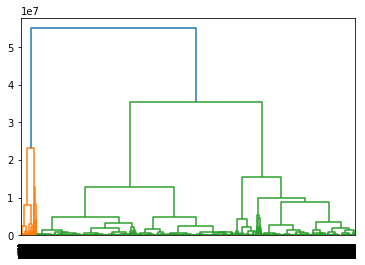

In [183]:
dend = dendrogram(wardlink)

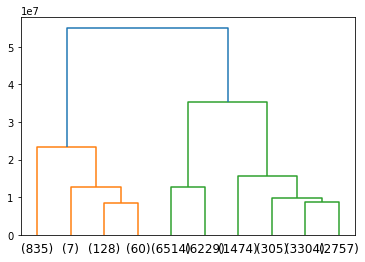

In [184]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

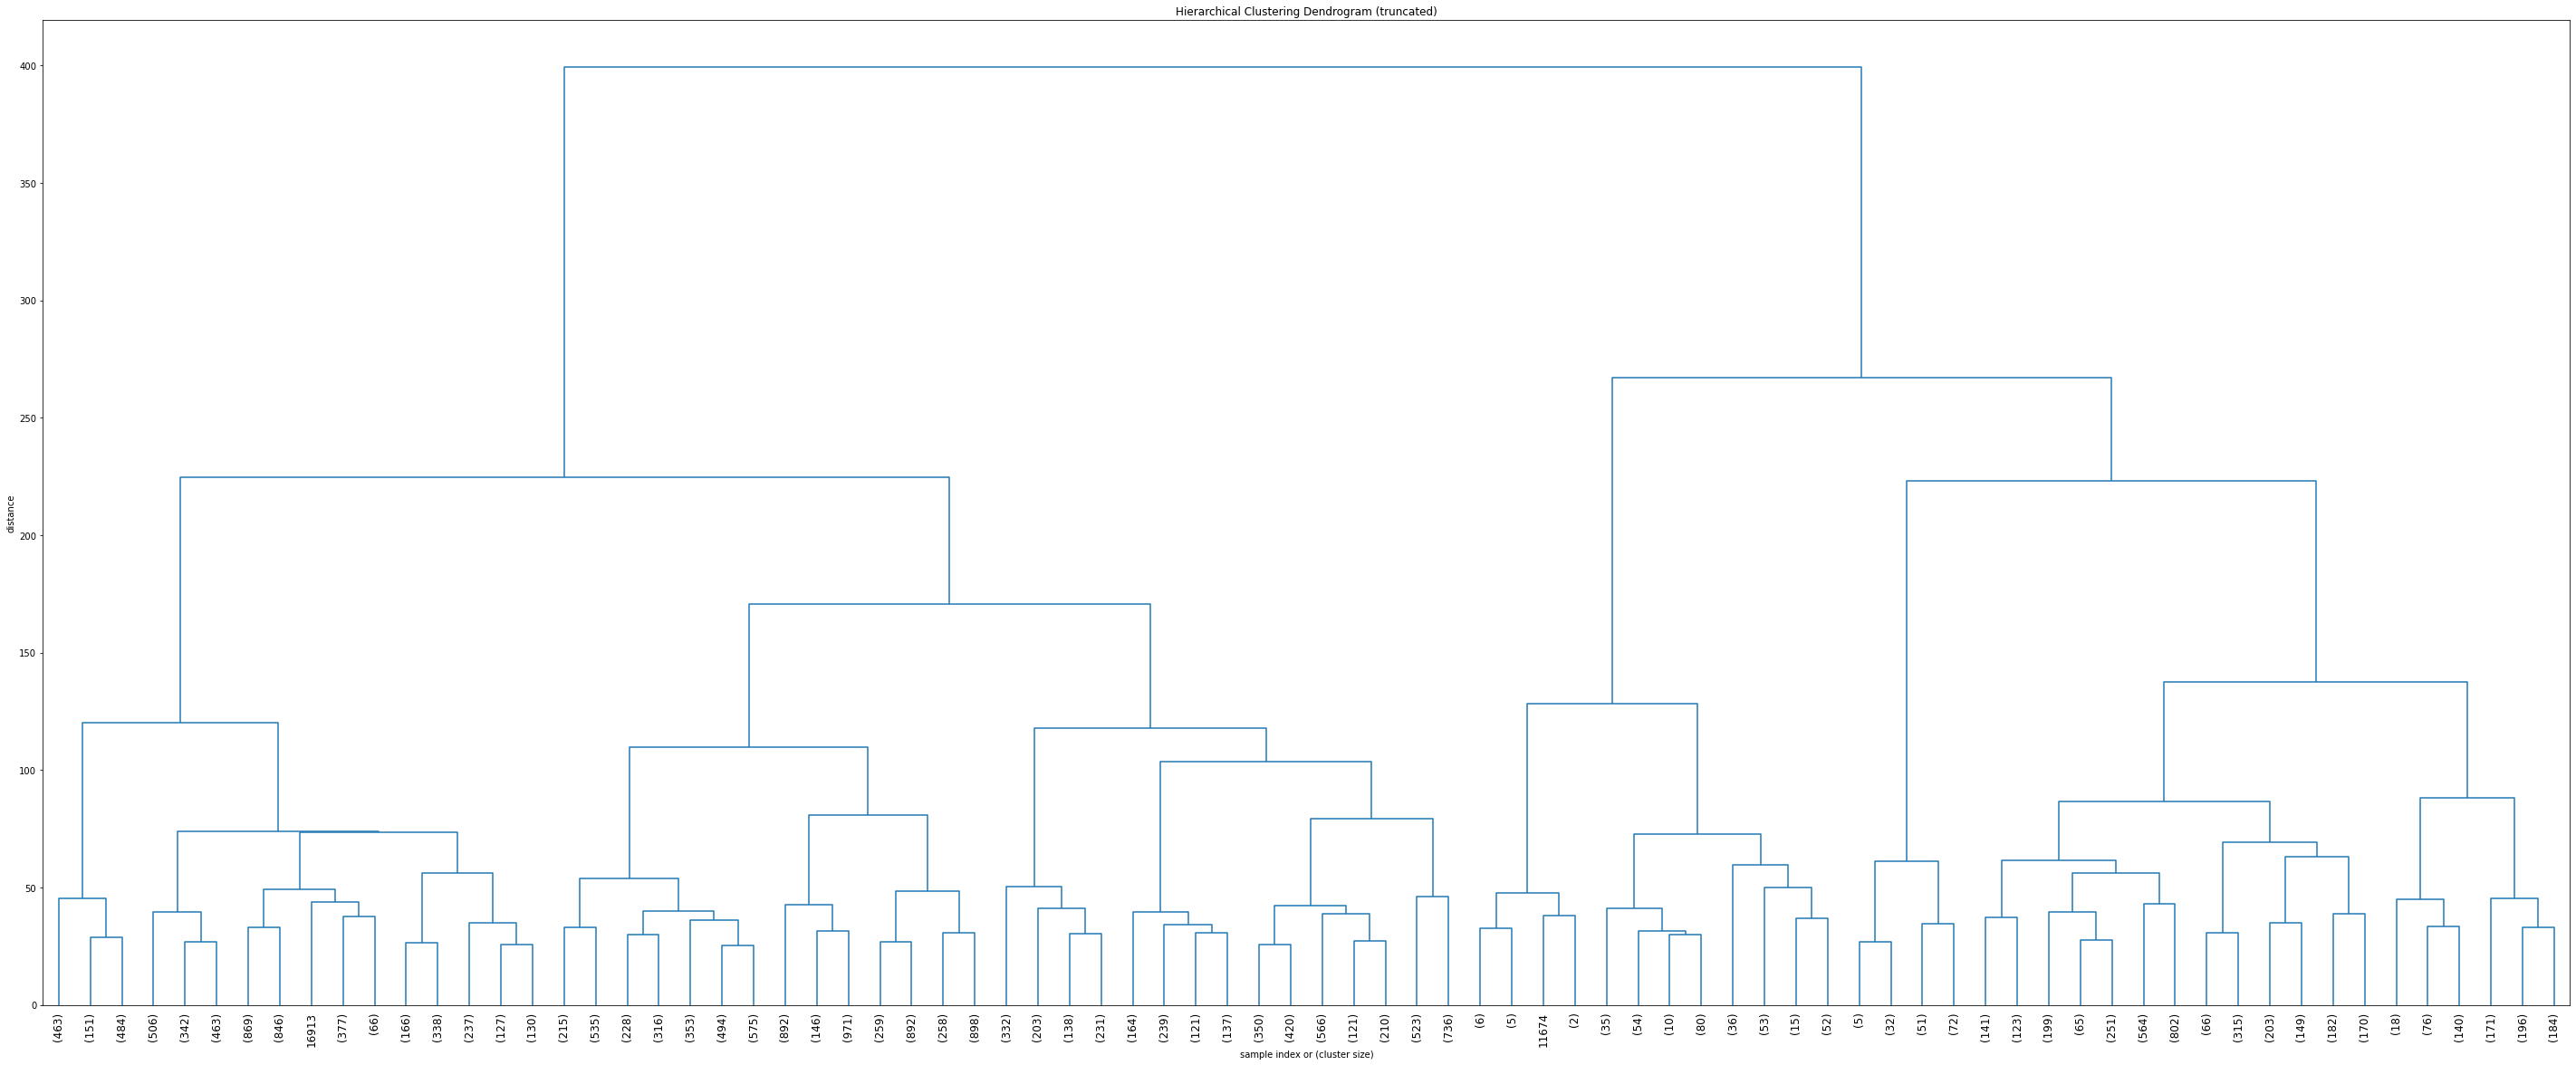

In [185]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  
    p=80,  
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

In [186]:
cluster = fcluster(wardlink, 3, criterion='maxclust')
cluster

array([3, 2, 3, ..., 3, 2, 3], dtype=int32)

In [187]:
df_pca['H_Clusters'] = cluster
df_pca.head(10)

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0   600000.0       4.0       1.75          3050.0       9440.0   1.0    0.0   
1   190000.0       2.0       1.00           670.0       3101.0   1.0    0.0   
2   735000.0       4.0       2.75          3040.0       2415.0   2.0    1.0   
3   257000.0       3.0       2.50          1740.0       3721.0   2.0    0.0   
4   450000.0       2.0       1.00          1120.0       4590.0   1.0    0.0   
5   245000.0       3.0       2.50          1610.0       7223.0   2.0    0.0   
6   466000.0       2.0       1.50          1140.0       1058.0   3.0    0.0   
7  1160000.0       4.0       3.50          4680.0       9700.0   2.0    0.0   
8   449950.0       4.0       2.50          3100.0      10000.0   2.0    0.0   
9   299950.0       2.0       1.75          1460.0      10506.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  living_measure15  \
0    0.0        3.0      8.0        1800.0    1250.0            2020.0   
1    0.0        4.0      6.0         670.0       0.0            1660.0   
2    4.0        3.0      8.0        3040.0       0.0            2620.0   
3    0.0        3.0      8.0        1740.0       0.0            2030.0   
4    0.0        3.0      7.0        1120.0       0.0            1120.0   
5    0.0        3.0      7.0        1610.0       0.0            1610.0   
6    0.0        3.0      7.0        1140.0       0.0            1170.0   
7    0.0        3.0     10.0        3360.0    1320.0            2800.0   
8    0.0        3.0      9.0        3100.0       0.0            1850.0   
9    0.0        3.0      7.0        1460.0       0.0            1460.0   

   lot_measure15  furnished  total_area  house_land_ratio  H_Clusters  
0         8660.0        0.0     12490.0              24.0           3  
1         4100.0        0.0      3771.0              18.0           2  
2         2433.0        0.0      5455.0              56.0           3  
3         3794.0        0.0      5461.0              32.0           2  
4         5100.0        0.0      5710.0              20.0           2  
5         7162.0        0.0      8833.0              18.0           2  
6         1116.0        0.0      2198.0              52.0           2  
7        12343.0        1.0     14380.0              33.0           3  
8         9438.0        1.0     13100.0              24.0           2  
9         8153.0        0.0     11966.0              12.0           2

In [188]:
df_pca['H_Clusters'].value_counts().sort_index()

1     1030
2    12743
3     7840
Name: H_Clusters, dtype: int64

KMeans Clustering

In [189]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [190]:
for i in range(1,11):
    print('The WSS value for',i,'clusters is',wcss[i-1])

The WSS value for 1 clusters is 367421.00000000006
The WSS value for 2 clusters is 282753.9048390166
The WSS value for 3 clusters is 247138.0481865032
The WSS value for 4 clusters is 218631.0958037321
The WSS value for 5 clusters is 194592.0132709063
The WSS value for 6 clusters is 175953.4425714242
The WSS value for 7 clusters is 164878.97818085825
The WSS value for 8 clusters is 155763.1473314669
The WSS value for 9 clusters is 148411.25591340082
The WSS value for 10 clusters is 141690.75523638647


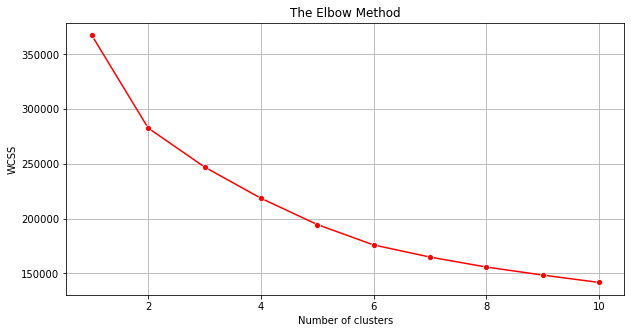

In [191]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [192]:
k_means1 = KMeans(n_clusters = 3)
k_means1.fit(df_scaled)
labels1 = k_means1.labels_
labels1

array([0, 0, 2, ..., 2, 0, 2])

In [193]:
sil_width = silhouette_samples(df_scaled,labels1)

In [194]:
df_pca['sil_width'] = sil_width
df_pca.head(5)

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000.0       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000.0       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000.0       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000.0       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000.0       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  living_measure15  \
0    0.0        3.0      8.0        1800.0    1250.0            2020.0   
1    0.0        4.0      6.0         670.0       0.0            1660.0   
2    4.0        3.0      8.0        3040.0       0.0            2620.0   
3    0.0        3.0      8.0        1740.0       0.0            2030.0   
4    0.0        3.0      7.0        1120.0       0.0            1120.0   

   lot_measure15  furnished  total_area  house_land_ratio  H_Clusters  \
0         8660.0        0.0     12490.0              24.0           3   
1         4100.0        0.0      3771.0              18.0           2   
2         2433.0        0.0      5455.0              56.0           3   
3         3794.0        0.0      5461.0              32.0           2   
4         5100.0        0.0      5710.0              20.0           2   

   sil_width  
0   0.284432  
1   0.525643  
2   0.027999  
3   0.392245  
4   0.531154

In [195]:
df_scaled["k_means1"] = labels1
df_scaled.head(10)

price  room_bed  room_bath  living_measure  lot_measure      ceil  \
0  0.162834  0.679192  -0.476136        1.056797    -0.136528 -0.913871   
1 -0.953256 -1.475263  -1.452238       -1.535440    -0.289704 -0.913871   
2  0.530328  0.679192   0.825334        1.045905    -0.306281  0.938773   
3 -0.770871 -0.398035   0.499967       -0.370022    -0.274722  0.938773   
4 -0.245491 -1.475263  -1.452238       -1.045311    -0.253724 -0.913871   
5 -0.803537 -0.398035   0.499967       -0.511615    -0.190100  0.938773   
6 -0.201937 -1.475263  -0.801503       -1.023528    -0.339071  2.791417   
7  1.687251  0.679192   1.801436        2.832153    -0.130245  0.938773   
8 -0.245627  0.679192   0.499967        1.111256    -0.122996  0.938773   
9 -0.653953 -1.475263  -0.476136       -0.674991    -0.110769 -0.913871   

       coast     sight  condition   quality  ceil_measure  basement  \
0  -0.086632 -0.305352  -0.627914  0.291953      0.014062  2.165764   
1  -0.086632 -0.305352   0.910673 -1.409540     -1.350564 -0.658681   
2  11.543060  4.919970  -0.627914  0.291953      1.511527 -0.658681   
3  -0.086632 -0.305352  -0.627914  0.291953     -0.058396 -0.658681   
4  -0.086632 -0.305352  -0.627914 -0.558793     -0.807129 -0.658681   
5  -0.086632 -0.305352  -0.627914 -0.558793     -0.215389 -0.658681   
6  -0.086632 -0.305352  -0.627914 -0.558793     -0.782977 -0.658681   
7  -0.086632 -0.305352  -0.627914  1.993447      1.897970  2.323933   
8  -0.086632 -0.305352  -0.627914  1.142700      1.583985 -0.658681   
9  -0.086632 -0.305352  -0.627914 -0.558793     -0.396534 -0.658681   

   living_measure15  lot_measure15  furnished  total_area  house_land_ratio  \
0          0.049875      -0.150342  -0.494456   -0.112532          0.153828   
1         -0.477222      -0.317567  -0.494456   -0.322289         -0.335049   
2          0.928369      -0.378699  -0.494456   -0.281776          2.761171   
3          0.064517      -0.328789  -0.494456   -0.281632          0.805664   
4         -1.267867      -0.280895  -0.494456   -0.275641         -0.172090   
5         -0.550429      -0.205277  -0.494456   -0.200510         -0.335049   
6         -1.194659      -0.426997  -0.494456   -0.360131          2.435253   
7          1.191918      -0.015279   2.022425   -0.067063          0.887143   
8         -0.199032      -0.121811   2.022425   -0.097856          0.153828   
9         -0.770053      -0.168935  -0.494456   -0.125138         -0.823925   

   k_means1  
0         0  
1         0  
2         2  
3         0  
4         0  
5         0  
6         0  
7         2  
8         2  
9         0

In [196]:
df_scaled['k_means1'].value_counts().sort_index()

0    16286
1      374
2     4953
Name: k_means1, dtype: int64